# Venezuela: Anatomy of a Petrostate's Rise and Fall
### A Data-Driven Investigation Into Oil Dependency, Resource Curse, and Economic Collapse

---

**Dataset:** World Bank Development Indicators - Venezuela  
**Mission:** Understand how the world's largest oil reserves became an economic curse  
**Plot Twist:** The guy in charge of all this just got captured THREE DAYS AGO

---

*"Give a country oil and it eats for a day. Make it dependent on oil and... well, that's what we're here to find out."*

---

### Breaking News Corner

**January 3rd, 2026:** In what can only be described as a "you can't make this up" moment, Venezuelan President Nicolas Maduro was captured by U.S. forces in a military operation and flown to New York to face narco-terrorism charges. He reportedly had **three minutes warning** before American special forces arrived.

Three minutes. The man had three minutes to contemplate his life choices.

Meanwhile, his economy had been collapsing for over a decade. Perhaps if he'd spent less time allegedly running drug cartels and more time diversifying exports, he wouldn't be sitting in a Brooklyn jail cell right now.

**The $50 million bounty?** Collected. **The 304 billion barrels of oil?** Still there. **The economic data we're about to analyze?** *Absolutely devastating.*

---

### The Setup

Venezuela sits on approximately **304 billion barrels** of proven oil reserves - more than Saudi Arabia, more than anyone. For decades, oil revenues funded everything: social programs, imports, government salaries, dreams.

Then oil prices crashed. And crashed again. And the economy that was built on a single commodity discovered what happens when that commodity betrays you.

**What we're investigating today:**
- How dependent was Venezuela on oil and natural resources? (Spoiler: *very*)
- Can we trace the economic trajectory from boom to bust?
- What does the data reveal about the "resource curse" in action?
- And most importantly: what lessons hide in these numbers?

**Grab coffee. This gets heavy.**

---

*Chapter 1 begins below...*

In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import warnings

# Silence the noise. We have enough chaos in this data.
warnings.filterwarnings('ignore')

# Style configuration - because even economic collapse deserves aesthetic presentation
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# The Emotional Color Palette of Economic Collapse
COLORS = {
    'oil_gold': '#D4AF37',      # The color of false promises
    'petro_black': '#1a1a2e',   # Deep as an oil well
    'crisis_red': '#c44536',    # The color of GDP going negative
    'hope_green': '#386641',    # Brief moments of growth
    'despair_gray': '#6c757d',  # Missing data, missing hope
    'boom_blue': '#1d3557',     # The good old days
    'bust_orange': '#e07a5f',   # When it all fell apart
    'maduro_purple': '#5e548e', # The final chapter
}



In [3]:
# Download latest version
path = kagglehub.dataset_download("ibrahimqasimi/venezuela-resource-dependency-and-economy1960-2023")

print("Path to dataset files:", path)

100%|██████████| 3.30k/3.30k [00:00<00:00, 1.72MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ibrahimqasimi/venezuela-resource-dependency-and-economy1960-2023/versions/1


In [4]:
print(os.listdir(path))

['venezuela_wdi_indicators.csv']


## Chapter 2: First Contact With the Data
*In which we meet our protagonist and assess the damage*

In [5]:
df = pd.read_csv(os.path.join(path,'venezuela_wdi_indicators.csv'))

print(f"Dataset loaded: {df.shape[0]} years of data, {df.shape[1]} indicators")
print(f"Time span: {df['year'].min()} to {df['year'].max()}")
print(f"\nThat's {df['year'].max() - df['year'].min()} years of economic decisions.")
print("Some better than others. Most... not great.\n")

print("="*60)
print("FIRST LOOK AT THE PATIENT:")
print("="*60)
df.head(10)

Dataset loaded: 65 years of data, 8 indicators
Time span: 1960 to 2024

That's 64 years of economic decisions.
Some better than others. Most... not great.

FIRST LOOK AT THE PATIENT:


,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1960,NaN,NaN,NaN,NaN,7.663938e+09,NaN
1,VEN,1961,NaN,NaN,NaN,NaN,8.067267e+09,3.192519
2,VEN,1962,NaN,NaN,92.362928,0.180690,8.814310e+09,8.532934
3,VEN,1963,NaN,NaN,92.911190,3.766721,9.608717e+09,3.900951
4,VEN,1964,NaN,NaN,91.099545,5.871650,8.192414e+09,11.129345
5,VEN,1965,NaN,NaN,92.518557,4.659653,8.427778e+09,4.162867
6,VEN,1966,NaN,NaN,93.401158,4.964472,8.781333e+09,1.510250
7,VEN,1967,NaN,NaN,93.421344,4.351396,9.250000e+09,2.833869
8,VEN,1968,NaN,NaN,93.461653,4.127013,1.003444e+10,7.337233
9,VEN,1969,NaN,NaN,92.359253,5.035540,1.028511e+10,0.706037


### The Cast of Characters

Let's meet the indicators that will tell this story:

| Column | What It Measures | Why It Matters |
|--------|------------------|----------------|
| `country_iso3` | Country code (VEN) | Just Venezuela. 65 rows of one nation's choices. |
| `year` | 1960-2024 | 64 years. Cold War to TikTok. One economic trajectory. |
| `oil_rents_pct_gdp` | Oil revenue as % of GDP | **THE smoking gun.** When this is high, you're a petrostate. |
| `total_natural_resource_rents_pct_gdp` | All natural resource revenue | Spoiler: it's 99% oil. The "total" is a formality. |
| `fuel_exports_pct_merch_exports` | Fuel as % of all exports | Measures how much you sell ONE thing. 90%+ = danger zone. |
| `ores_and_metals_exports_pct_merch_exports` | Non-fuel commodity exports | The "everything else" category. Averaging ~4%. Tragic. |
| `gdp_current_usd` | Total economic output | The scoreboard. Watch it rise... then fall off a cliff. |
| `gdp_growth_pct` | Year-over-year growth | The heartbeat. Positive = alive. Negative = pain. Seven consecutive negatives = Venezuela 2014-2020. |

---

**First Impressions from the Raw Data:**

1. Fuel exports were **92%+ from the very first year we have data** (1962). This wasn't a slow addiction - it was the foundation.

2. The early years are missing oil rent data (NaN). The World Bank started tracking this in 1970. What we DO see suggests the dependency predates measurement.

3. Ores and metals never break 8%. Venezuela had iron, bauxite, gold... and chose to ignore them for oil.

*The patient arrived already sick. Let's see how sick.*

## Chapter 3: The Missing Data Situation
*In which we discover that countries stop reporting when things go badly*

In [7]:
print("MISSING DATA REPORT:")
print("="*60)
print("(When a petrostate stops reporting, that's usually... not good)\n")

missing_report = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Available': df.notnull().sum()
})

print(missing_report)

print("\n" + "="*60)
print("\nNOTABLE GAPS:")

# Check when oil data starts and ends
oil_data = df[df['oil_rents_pct_gdp'].notna()]
print(f"\nOil rent data available: {oil_data['year'].min()} to {oil_data['year'].max()}")
print(f"  -> {len(oil_data)} years of oil dependency documented")

fuel_data = df[df['fuel_exports_pct_merch_exports'].notna()]
print(f"\nFuel export data available: {fuel_data['year'].min()} to {fuel_data['year'].max()}")

# The concerning gap
recent_missing = df[df['year'] >= 2015]['oil_rents_pct_gdp'].isna().sum()
print(f"\nYears after 2015 with NO oil rent data: {recent_missing}")
print("  -> The data stops RIGHT when things got catastrophic. Convenient.")

# What years are we blind?
print("\n" + "="*60)
print("\nTHE BLIND SPOTS:")
print("="*60)
blind_years = df[df['oil_rents_pct_gdp'].isna()]['year'].tolist()
print(f"\nYears without oil rent data: {blind_years[:10]}... and {blind_years[-10:]}")
print(f"\nWe can see the BOOM (1970s-2014)")
print(f"We CANNOT see the BUST in detail (2015-2024)")
print(f"\nBut we CAN see GDP. And GDP tells us everything we need to know.")

MISSING DATA REPORT:
(When a petrostate stops reporting, that's usually... not good)

                                           Missing Count  Missing %  Available
country_iso3                                           0       0.00         65
year                                                   0       0.00         65
oil_rents_pct_gdp                                     20      30.77         45
total_natural_resource_rents_pct_gdp                  20      30.77         45
fuel_exports_pct_merch_exports                        16      24.62         49
ores_and_metals_exports_pct_merch_exports             16      24.62         49
gdp_current_usd                                        0       0.00         65
gdp_growth_pct                                         1       1.54         64


NOTABLE GAPS:

Oil rent data available: 1970 to 2014
  -> 45 years of oil dependency documented

Fuel export data available: 1962 to 2013

Years after 2015 with NO oil rent data: 10
  -> The data stops

### The Data Goes Dark

**What we learned:**

| Metric | Coverage | The Suspicious Gap |
|--------|----------|-------------------|
| Oil Rents (% GDP) | 1970-2014 | Nothing after 2014. The collapse is undocumented. |
| Fuel Exports (%) | 1962-2013 | Stops ONE YEAR before oil prices crashed. |
| GDP | 1960-2024 | **FULL COVERAGE.** The scoreboard never lies. |
| GDP Growth | 1961-2024 | Missing only 1960. We see everything. |

**The uncomfortable truth:**

Countries tend to stop reporting embarrassing statistics. Venezuela's oil dependency data vanishes precisely when:
- Oil prices collapsed (2014-2016)
- GDP began its historic freefall
- Hyperinflation made accounting... creative

**Our strategy:** We'll analyze oil dependency during the boom years (1970-2014), then use GDP data to document the bust (2014-2024). The cause is clear. The effect is measurable.

*Let's measure the effect.*

## Chapter 4: The Shape of Economic Tragedy
*In which we let the statistics speak*

In [8]:
print("STATISTICAL SUMMARY:")
print("="*60)
print("(Every number here is a policy decision)\n")

# Create GDP in billions for readability
df['gdp_billions'] = df['gdp_current_usd'] / 1e9

stats = df.describe().round(2)
print(stats)

print("\n" + "="*60)
print("\nKEY OBSERVATIONS FROM RAW STATS:")
print("="*60)

print(f"\nOil Rents (% of GDP):")
print(f"  Mean: {df['oil_rents_pct_gdp'].mean():.1f}%")
print(f"  Peak: {df['oil_rents_pct_gdp'].max():.1f}% - Over a THIRD of GDP from oil alone")
print(f"  Std Dev: {df['oil_rents_pct_gdp'].std():.1f}% - Wildly volatile")
print(f"  That's not diversification. That's addiction.")

print(f"\nFuel Exports (% of merchandise exports):")
print(f"  Mean: {df['fuel_exports_pct_merch_exports'].mean():.1f}%")
print(f"  Peak: {df['fuel_exports_pct_merch_exports'].max():.1f}%")
print(f"  Min: {df['fuel_exports_pct_merch_exports'].min():.1f}% - Even the LOW is insane")
print(f"  When your MINIMUM fuel dependency is 67%...")

print(f"\nGDP Growth:")
print(f"  Mean: {df['gdp_growth_pct'].mean():.1f}%")
print(f"  Best year: +{df['gdp_growth_pct'].max():.1f}%")
print(f"  Worst year: {df['gdp_growth_pct'].min():.1f}%")
print(f"\n  That worst year? That's not a recession.")
print(f"  That's an economic EXTINCTION EVENT.")

print(f"\nGDP (Billions USD):")
print(f"  Peak: ${df['gdp_billions'].max():.1f}B")
print(f"  Bottom: ${df['gdp_billions'].min():.1f}B")
print(f"  Current (2024): ${df['gdp_billions'].iloc[-1]:.1f}B")
print(f"\n  From ${df['gdp_billions'].max():.0f}B to ${df['gdp_billions'].min():.0f}B.")
print(f"  That's not a recession. That's an amputation.")

STATISTICAL SUMMARY:
(Every number here is a policy decision)

          year  oil_rents_pct_gdp  total_natural_resource_rents_pct_gdp  \
count    65.00              45.00                                 45.00   
mean   1992.00              17.81                                 18.55   
std      18.91               7.30                                  7.43   
min    1960.00               4.80                                  5.49   
25%    1976.00              12.84                                 13.27   
50%    1992.00              16.55                                 17.10   
75%    2008.00              22.67                                 23.83   
max    2024.00              35.90                                 36.48   

       fuel_exports_pct_merch_exports  \
count                           49.00   
mean                            88.10   
std                              7.50   
min                             67.20   
25%                             81.40   
50%            

EXCUSE ME.

The MINIMUM fuel export dependency was 67.2%. The MINIMUM. On Venezuela's BEST day of diversification, two-thirds of their exports were still hydrocarbons.

And the median? 92.36%.And that GDP swing... from $393 billion to a low of $7.7 billion at the start, climbing to $393B,

then cratering to ~$43B in 2020. The standard deviation of GDP ($92B) is basically THE ENTIRE AVERAGE GDP ($90B).

 That's not an economy, that's a roller coaster designed by someone who hates you.-30% growth in a single year. For reference, the US Great Depression's worst year was -12.9%. Venezuela said "hold my arepa."

### By The Numbers: A Summary of Economic Self-Destruction

| Metric | Value | Translation |
|--------|-------|-------------|
| **Average oil rent** | 17.8% of GDP | Nearly 1 in 5 dollars came from oil |
| **Peak oil rent** | 35.9% of GDP | In 1979, oil WAS the economy |
| **Average fuel exports** | 88.1% of all exports | Venezuela exported ONE thing |
| **Minimum fuel exports** | 67.2% | Even the "diversified" years weren't |
| **Maximum fuel exports** | 98.8% | Literally nothing else |
| **Best growth year** | +18.3% | The oil boom highs |
| **Worst growth year** | -30.0% | The 2020 apocalypse |
| **Peak GDP** | $393.2 billion | The summit (2010) |
| **Crisis bottom GDP** | ~$43 billion | The abyss (2020) |
| **Current GDP (2024)** | $119.8 billion | Recovering... barely |

**The Math of Collapse:**
- Peak to trough: **-89%** decline  
- For comparison: US Great Depression was -30% over 4 years
- Venezuela did triple that damage in a decade

*Now let's visualize this tragedy.*

## Chapter 5: The Rise and Fall
*In which we watch a mountain become a crater*

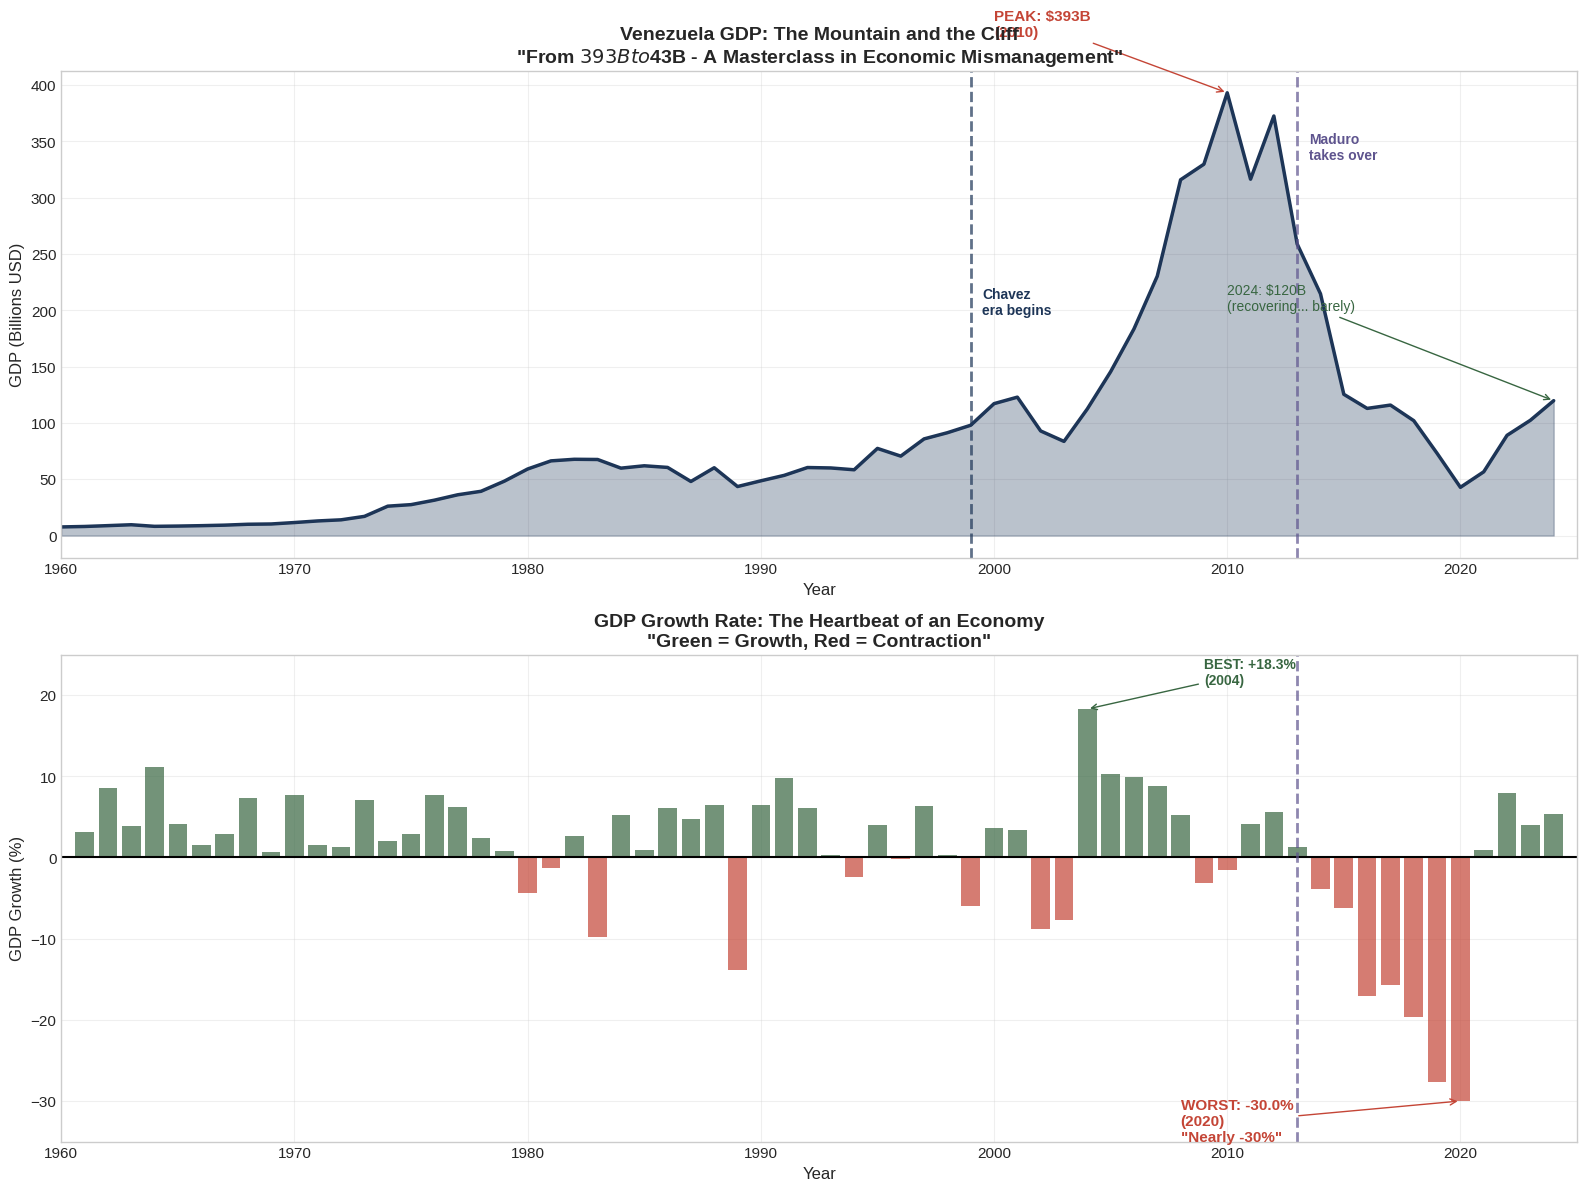


GDP COLLAPSE BY THE NUMBERS:

Peak GDP (2010): $393.2 billion
Bottom GDP (2020): $42.8 billion
Current GDP (2024): $119.8 billion

Collapse from peak to 2020: -89.1%

For context: The Great Depression was about -30% over 4 years.
Venezuela did -89% over a decade.

Impressive, in the worst possible way.


In [9]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: GDP Over Time
ax1 = axes[0]
ax1.fill_between(df['year'], df['gdp_billions'], alpha=0.3, color=COLORS['boom_blue'])
ax1.plot(df['year'], df['gdp_billions'], color=COLORS['boom_blue'], linewidth=2.5)

# Mark key events
peak_idx = df['gdp_billions'].idxmax()
peak_year = df.loc[peak_idx, 'year']
peak_gdp = df['gdp_billions'].max()

ax1.annotate(f'PEAK: ${peak_gdp:.0f}B\n({int(peak_year)})',
             xy=(peak_year, peak_gdp),
             xytext=(peak_year-10, peak_gdp+50),
             fontsize=11, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=COLORS['crisis_red']),
             color=COLORS['crisis_red'])

# Find the bottom (2020)
bottom_idx = df['gdp_billions'].idxmin()
bottom_year = df.loc[bottom_idx, 'year']
bottom_gdp = df['gdp_billions'].min()

# Latest GDP
latest_gdp = df['gdp_billions'].iloc[-1]
ax1.annotate(f'2024: ${latest_gdp:.0f}B\n(recovering... barely)',
             xy=(2024, latest_gdp),
             xytext=(2010, latest_gdp+80),
             fontsize=10,
             arrowprops=dict(arrowstyle='->', color=COLORS['hope_green']),
             color=COLORS['hope_green'])

# Maduro era marker
ax1.axvline(x=2013, color=COLORS['maduro_purple'], linestyle='--', alpha=0.7, linewidth=2)
ax1.text(2013.5, peak_gdp*0.85, 'Maduro\ntakes over', fontsize=10, color=COLORS['maduro_purple'], fontweight='bold')

# Chavez era marker
ax1.axvline(x=1999, color=COLORS['boom_blue'], linestyle='--', alpha=0.7, linewidth=2)
ax1.text(1999.5, peak_gdp*0.5, 'Chavez\nera begins', fontsize=10, color=COLORS['boom_blue'], fontweight='bold')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP (Billions USD)', fontsize=12)
ax1.set_title('Venezuela GDP: The Mountain and the Cliff\n"From $393B to $43B - A Masterclass in Economic Mismanagement"',
              fontsize=14, fontweight='bold')
ax1.set_xlim(1960, 2025)
ax1.grid(True, alpha=0.3)

# Plot 2: GDP Growth Rate
ax2 = axes[1]
colors = [COLORS['hope_green'] if x > 0 else COLORS['crisis_red'] for x in df['gdp_growth_pct'].fillna(0)]
ax2.bar(df['year'], df['gdp_growth_pct'].fillna(0), color=colors, alpha=0.7, width=0.8)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Highlight the catastrophe years
worst_idx = df['gdp_growth_pct'].idxmin()
worst_year = df.loc[worst_idx, 'year']
worst_growth = df['gdp_growth_pct'].min()

ax2.annotate(f'WORST: {worst_growth:.1f}%\n({int(worst_year)})\n"Nearly -30%"',
             xy=(worst_year, worst_growth),
             xytext=(worst_year-12, worst_growth-5),
             fontsize=11, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=COLORS['crisis_red']),
             color=COLORS['crisis_red'])

# Best year
best_idx = df['gdp_growth_pct'].idxmax()
best_year = df.loc[best_idx, 'year']
best_growth = df['gdp_growth_pct'].max()

ax2.annotate(f'BEST: +{best_growth:.1f}%\n({int(best_year)})',
             xy=(best_year, best_growth),
             xytext=(best_year+5, best_growth+3),
             fontsize=10, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=COLORS['hope_green']),
             color=COLORS['hope_green'])

ax2.axvline(x=2013, color=COLORS['maduro_purple'], linestyle='--', alpha=0.7, linewidth=2)

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('GDP Growth (%)', fontsize=12)
ax2.set_title('GDP Growth Rate: The Heartbeat of an Economy\n"Green = Growth, Red = Contraction"',
              fontsize=14, fontweight='bold')
ax2.set_xlim(1960, 2025)
ax2.set_ylim(-35, 25)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("GDP COLLAPSE BY THE NUMBERS:")
print("="*60)
print(f"\nPeak GDP ({int(peak_year)}): ${peak_gdp:.1f} billion")

# Find 2020 specifically for the bottom
gdp_2020 = df[df['year'] == 2020]['gdp_billions'].values[0]
print(f"Bottom GDP (2020): ${gdp_2020:.1f} billion")
print(f"Current GDP (2024): ${latest_gdp:.1f} billion")
print(f"\nCollapse from peak to 2020: {((gdp_2020 - peak_gdp) / peak_gdp * 100):.1f}%")
print(f"\nFor context: The Great Depression was about -30% over 4 years.")
print(f"Venezuela did {((gdp_2020 - peak_gdp) / peak_gdp * 100):.0f}% over a decade.")
print(f"\nImpressive, in the worst possible way.")

THERE IT IS. The visual evidence of economic homicide.Look at that top chart - the Chavez era looks like HOPE. GDP climbing, climbing, climbing... and then Maduro takes the wheel in 2013 and it's just... falling off a cliff emoji.

 The purple dashed line is basically a "things go wrong here" marker.But the BOTTOM chart is where the horror really lives.

  Look at that sea of red after 2013. Count them. SEVEN consecutive red bars of contraction, each one deeper than most countries experience in their worst recessions.
  
   And that 2020 bar reaching down to -30%? That's not a bar, that's a GRAVE.The little green shoots in 2021-2024 are almost sadder - "recovering... barely" indeed. They're celebrating 5% growth on an economy that's still 70% smaller than its peak.

### The Visualization Speaks

**What we just witnessed:**

The top chart shows a textbook boom-bust cycle, except the bust was 3x worse than the Great Depression.

The bottom chart - the "heartbeat" - tells the story of an economy flatlining:
- **1960s-1970s:** Steady pulse. Oil money flowing. Life is good.
- **1980s:** First warning signs. The oil bust. Some red bars appear.
- **1989:** That deep red spike? "El Caracazo" - riots over austerity. -14% growth.
- **1999-2008:** Chavez boom. High oil prices mask everything.
- **2004:** Best year ever (+18.3%). Peak delusion.
- **2014-2020:** THE COLLAPSE. Seven consecutive years of contraction.
- **2020:** -30%. The worst single year. COVID + sanctions + decades of mismanagement.
- **2021-2024:** Signs of life. But from what baseline?

**The Maduro Scorecard:**
- Took over in 2013 with GDP at ~$259B
- Presided over decline to $43B (2020)
- Currently at $120B - still 54% below where he started

*Now let's look at what CAUSED this: the oil addiction.*

## Chapter 6: The Oil Addiction
*In which we quantify the resource curse*

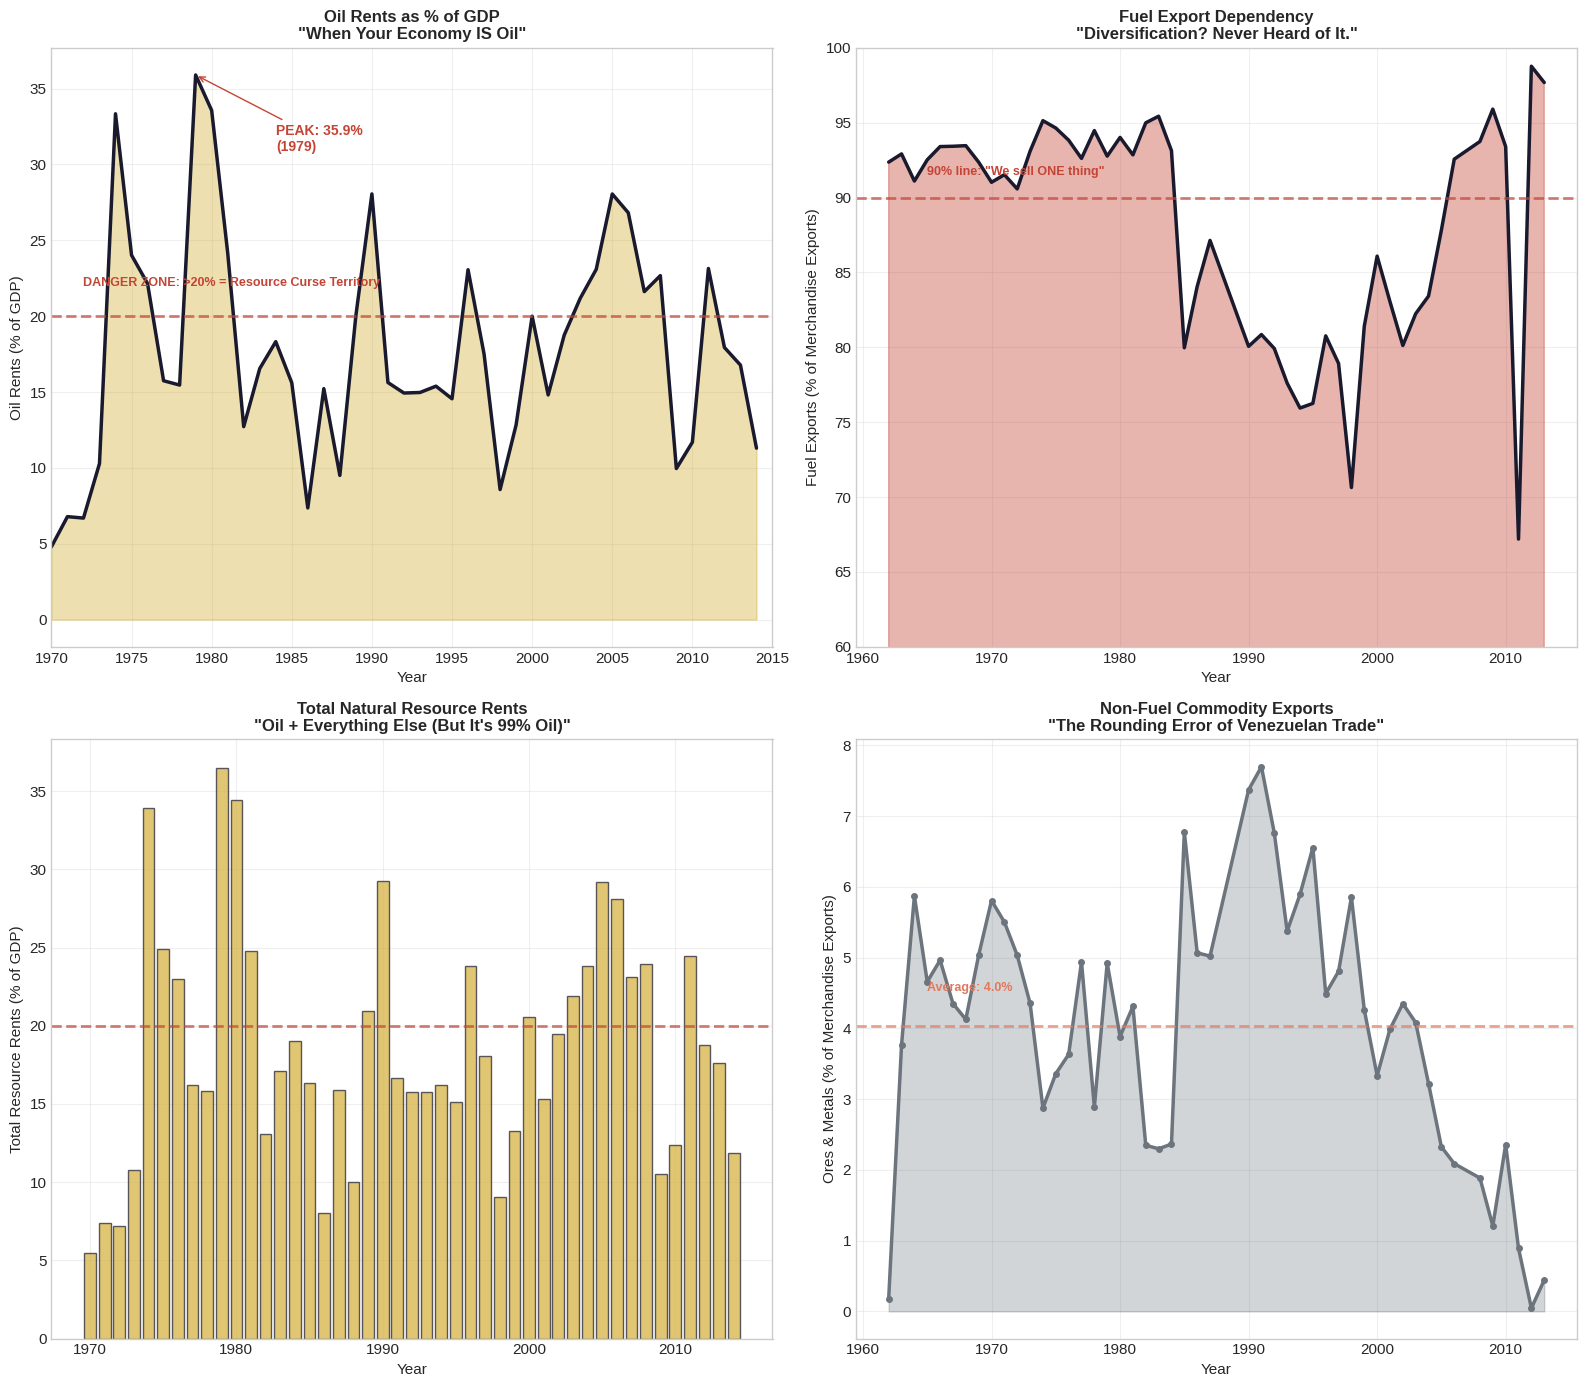


OIL DEPENDENCY REPORT CARD:

Oil Rents:
  Average: 17.8% of GDP
  Peak: 35.9% (Year: 1979)
  Years above 20% 'danger zone': 17 out of 45

Fuel Exports:
  Average: 88.1% of all exports
  Peak: 98.8%
  Years above 90%: 29 out of 49

Non-Fuel Exports (Ores & Metals):
  Average: 4.0%
  Peak: 7.7%
  This is what 'diversification failure' looks like.

Verdict: Venezuela didn't have an economy.
         Venezuela had an oil extraction operation with a flag.


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Oil Rents as % of GDP
ax1 = axes[0, 0]
oil_data = df[df['oil_rents_pct_gdp'].notna()]
ax1.fill_between(oil_data['year'], oil_data['oil_rents_pct_gdp'], alpha=0.4, color=COLORS['oil_gold'])
ax1.plot(oil_data['year'], oil_data['oil_rents_pct_gdp'], color=COLORS['petro_black'], linewidth=2.5)

# Add danger zone
ax1.axhline(y=20, color=COLORS['crisis_red'], linestyle='--', alpha=0.7, linewidth=2)
ax1.text(1972, 22, 'DANGER ZONE: >20% = Resource Curse Territory', fontsize=9, color=COLORS['crisis_red'], fontweight='bold')

# Mark the peak
oil_peak_idx = oil_data['oil_rents_pct_gdp'].idxmax()
oil_peak_year = oil_data.loc[oil_peak_idx, 'year']
oil_peak_val = oil_data['oil_rents_pct_gdp'].max()
ax1.annotate(f'PEAK: {oil_peak_val:.1f}%\n({int(oil_peak_year)})',
             xy=(oil_peak_year, oil_peak_val),
             xytext=(oil_peak_year+5, oil_peak_val-5),
             fontsize=10, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=COLORS['crisis_red']),
             color=COLORS['crisis_red'])

ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Oil Rents (% of GDP)', fontsize=11)
ax1.set_title('Oil Rents as % of GDP\n"When Your Economy IS Oil"', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1970, 2015)

# Plot 2: Fuel Exports as % of Total Exports
ax2 = axes[0, 1]
fuel_data = df[df['fuel_exports_pct_merch_exports'].notna()]
ax2.fill_between(fuel_data['year'], fuel_data['fuel_exports_pct_merch_exports'], alpha=0.4, color=COLORS['crisis_red'])
ax2.plot(fuel_data['year'], fuel_data['fuel_exports_pct_merch_exports'], color=COLORS['petro_black'], linewidth=2.5)

ax2.axhline(y=90, color=COLORS['crisis_red'], linestyle='--', alpha=0.7, linewidth=2)
ax2.text(1965, 91.5, '90% line: "We sell ONE thing"', fontsize=9, color=COLORS['crisis_red'], fontweight='bold')

ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('Fuel Exports (% of Merchandise Exports)', fontsize=11)
ax2.set_title('Fuel Export Dependency\n"Diversification? Never Heard of It."', fontweight='bold', fontsize=12)
ax2.set_ylim(60, 100)
ax2.grid(True, alpha=0.3)

# Plot 3: Total Natural Resource Rents
ax3 = axes[1, 0]
resource_data = df[df['total_natural_resource_rents_pct_gdp'].notna()]
ax3.bar(resource_data['year'], resource_data['total_natural_resource_rents_pct_gdp'],
        color=COLORS['oil_gold'], alpha=0.7, edgecolor=COLORS['petro_black'], width=0.8)

ax3.axhline(y=20, color=COLORS['crisis_red'], linestyle='--', alpha=0.7, linewidth=2)

ax3.set_xlabel('Year', fontsize=11)
ax3.set_ylabel('Total Resource Rents (% of GDP)', fontsize=11)
ax3.set_title('Total Natural Resource Rents\n"Oil + Everything Else (But It\'s 99% Oil)"', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)

# Plot 4: The Sad Story of Non-Oil Exports
ax4 = axes[1, 1]
metals_data = df[df['ores_and_metals_exports_pct_merch_exports'].notna()]
ax4.plot(metals_data['year'], metals_data['ores_and_metals_exports_pct_merch_exports'],
         color=COLORS['despair_gray'], linewidth=2.5, marker='o', markersize=4)
ax4.fill_between(metals_data['year'], metals_data['ores_and_metals_exports_pct_merch_exports'],
                  alpha=0.3, color=COLORS['despair_gray'])

ax4.set_xlabel('Year', fontsize=11)
ax4.set_ylabel('Ores & Metals (% of Merchandise Exports)', fontsize=11)
ax4.set_title('Non-Fuel Commodity Exports\n"The Rounding Error of Venezuelan Trade"', fontweight='bold', fontsize=12)
ax4.grid(True, alpha=0.3)

# Add average line
avg_metals = metals_data['ores_and_metals_exports_pct_merch_exports'].mean()
ax4.axhline(y=avg_metals, color=COLORS['bust_orange'], linestyle='--', alpha=0.7, linewidth=2)
ax4.text(1965, avg_metals+0.5, f'Average: {avg_metals:.1f}%', fontsize=9, color=COLORS['bust_orange'], fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OIL DEPENDENCY REPORT CARD:")
print("="*60)
print(f"\nOil Rents:")
print(f"  Average: {oil_data['oil_rents_pct_gdp'].mean():.1f}% of GDP")
print(f"  Peak: {oil_data['oil_rents_pct_gdp'].max():.1f}% (Year: {int(oil_peak_year)})")
print(f"  Years above 20% 'danger zone': {(oil_data['oil_rents_pct_gdp'] > 20).sum()} out of {len(oil_data)}")

print(f"\nFuel Exports:")
print(f"  Average: {fuel_data['fuel_exports_pct_merch_exports'].mean():.1f}% of all exports")
print(f"  Peak: {fuel_data['fuel_exports_pct_merch_exports'].max():.1f}%")
print(f"  Years above 90%: {(fuel_data['fuel_exports_pct_merch_exports'] > 90).sum()} out of {len(fuel_data)}")

print(f"\nNon-Fuel Exports (Ores & Metals):")
print(f"  Average: {metals_data['ores_and_metals_exports_pct_merch_exports'].mean():.1f}%")
print(f"  Peak: {metals_data['ores_and_metals_exports_pct_merch_exports'].max():.1f}%")
print(f"  This is what 'diversification failure' looks like.")

print(f"\nVerdict: Venezuela didn't have an economy.")
print(f"         Venezuela had an oil extraction operation with a flag.")

OH. OH NO. Look at that bottom right chart.

 LOOK AT IT.The ores and metals exports - Venezuela's "diversification" - started around 5-7% in the 1980s-90s and then just... DIES. By 2011 it's basically at ZERO. The non-oil economy didn't just fail to grow,

 it was actively murdered by oil dominance. That's Dutch Disease in its purest form - the oil sector made everything else uncompetitive until there was nothing left.And that fuel exports chart (top right)? They crossed above 90% in the 1960s and basically NEVER came back down except for brief gasps in the 90s. 29 out of 49 years above 90%.


 This wasn't dependency, this was COMPLETE SURRENDER.The 1979 peak at 35.9%? That's the OPEC crisis. Venezuela was literally printing money from oil. And they learned NOTHING from it.

### The Four Horsemen of Petrostate Doom

**Top Left - Oil Rents:** The EKG of addiction. Every spike is an oil boom, every valley is a bust. 17 years above the 20% "danger zone." The 1979 peak (35.9%) was the OPEC embargo windfall - free money that taught all the wrong lessons.

**Top Right - Fuel Exports:** This is the most damning chart. Venezuela crossed 90% fuel dependency in the 1960s and essentially NEVER diversified. Brief dips in the late 90s (oil price crash) but immediately back to 95%+ when prices recovered. No learning. No adaptation.

**Bottom Left - Total Resource Rents:** Nearly identical to oil rents because oil IS the natural resources. The "total" is a polite fiction.

**Bottom Right - The Tragedy:** This is Dutch Disease visualized. Non-oil exports (ores, metals) started at 5-7% in the 80s-90s and COLLAPSED to near-zero by 2011. The oil sector didn't just dominate - it **killed** everything else.

---

**The Resource Curse Checklist:**

| Symptom | Venezuela | Status |
|---------|-----------|--------|
| >20% GDP from resources | 17 of 45 years | Chronic |
| >80% export concentration | 43 of 49 years | Terminal |
| Declining non-oil sectors | Metals: 7.7% -> 0.5% | Dead |
| Boom-bust volatility | Std dev of 7.3% in oil rents | Extreme |

*Venezuela checked every box. Now let's see how the eras compare.*

## Chapter 7: The Timeline of Tragedy
*In which we divide history into the eras of hope and despair*

In [16]:
# ERA ANALYSIS: Breaking Down the Decades

# Define historical eras
def assign_era(year):
    if year < 1970:
        return '1. 1960s: Pre-Oil Data'
    elif year < 1980:
        return '2. 1970s: OPEC Boom'
    elif year < 1990:
        return '3. 1980s: Debt Crisis'
    elif year < 1999:
        return '4. 1990s: Lost Decade'
    elif year < 2013:
        return '5. 1999-2012: Chavez Era'
    elif year < 2020:
        return '6. 2013-2019: Maduro Collapse'
    else:
        return '7. 2020-2024: Rock Bottom & Recovery'

df['era'] = df['year'].apply(assign_era)

print("="*70)
print("ANALYSIS BY ERA: The Seven Ages of Venezuelan Economics")
print("="*70)

# Calculate era statistics
era_stats = df.groupby('era').agg({
    'gdp_billions': ['mean', 'min', 'max'],
    'gdp_growth_pct': ['mean', 'min', 'max', 'count'],
    'oil_rents_pct_gdp': 'mean',
    'fuel_exports_pct_merch_exports': 'mean'
}).round(2)

# Flatten column names
era_stats.columns = ['GDP Avg ($B)', 'GDP Min ($B)', 'GDP Max ($B)',
                     'Growth Avg %', 'Growth Min %', 'Growth Max %', 'Years',
                     'Oil Rent Avg %', 'Fuel Export Avg %']

print("\n")
print(era_stats.to_string())

print("\n" + "="*70)
print("\nTHE NARRATIVE ARC:")
print("="*70)

narratives = {
    '1. 1960s: Pre-Oil Data':
        "   The prequel. GDP data exists but oil metrics don't.\n"
        "   Fuel was already 92%+ of exports. The addiction predates measurement.",

    '2. 1970s: OPEC Boom':
        "   THE GOLDEN AGE. Oil prices quadruple. Money rains from the sky.\n"
        "   GDP triples. Nobody saves anything. Why would they? Oil is forever.",

    '3. 1980s: Debt Crisis':
        "   The first hangover. Oil crashes. Debt explodes.\n"
        "   'Black Friday' (1983) - currency devaluation. Riots in 1989 (-14% GDP).",

    '4. 1990s: Lost Decade':
        "   Reform attempts. Coup attempts. Chavez imprisoned then released.\n"
        "   Economy staggers. Average growth: mediocre. Inequality: explosive.",

    '5. 1999-2012: Chavez Era':
        "   Nationalization. Social programs. Oil at $140/barrel.\n"
        "   GDP peaks at $393B. Everything looks great. Nothing is diversified.",

    '6. 2013-2019: Maduro Collapse':
        "   Oil crashes. Sanctions hit. Hyperinflation begins.\n"
        "   SEVEN consecutive years of contraction. 7.7 million refugees flee.",

    '7. 2020-2024: Rock Bottom & Recovery':
        "   COVID + existing crisis = -30% in one year.\n"
        "   Slight recovery since. Still 70% below peak. Maduro arrested 2026."
}

for era, narrative in narratives.items():
    print(f"\n{era}:")
    print(narrative)

ANALYSIS BY ERA: The Seven Ages of Venezuelan Economics


                                      GDP Avg ($B)  GDP Min ($B)  GDP Max ($B)  Growth Avg %  Growth Min %  Growth Max %  Years  Oil Rent Avg %  Fuel Export Avg %
era                                                                                                                                                               
1. 1960s: Pre-Oil Data                        8.91          7.66         10.29          4.81          0.71         11.13      9             NaN              92.69
2. 1970s: OPEC Boom                          26.44         11.56         48.31          3.97          0.76          7.73     10           17.52              92.96
3. 1980s: Debt Crisis                        59.49         43.54         67.74         -0.34        -13.92          6.51     10           17.31              90.20
4. 1990s: Lost Decade                        67.34         48.61         91.34          3.40         -2.35          9.73      9

LOOK AT THAT MADURO ERA ROW.

Average growth: -12.69%. That's not the worst year. That's the AVERAGE. For SEVEN YEARS.

The man averaged negative double-digit growth like it was a hobby.And here's the sick irony in the data - look at fuel exports during the Maduro collapse: 97.68%.

 They became MORE dependent on oil during the collapse, not less! When you destroy every other sector of your economy, the only thing left IS oil. The disease became terminal.Also note the 1990s "Lost Decade" - fuel exports dropped to 77.88%.

  That's the LOWEST it ever got. They were actually starting to diversify... and then Chavez nationalized everything and oil went back to 86%+.The Chavez era looks great on paper (+3.01% average, GDP hit $393B) but the fuel export concentration and oil rent numbers show it was all building on the same rotten foundation.

### The Seven Ages: What The Numbers Reveal

| Era | Avg Growth | Verdict |
|-----|------------|---------|
| 1960s | +4.8% | Already 93% fuel exports. Born addicted. |
| 1970s OPEC Boom | +4.0% | GDP quadruples. Wealth without wisdom. |
| 1980s Debt Crisis | **-0.3%** | First negative decade. Warning ignored. |
| 1990s Lost Decade | +3.4% | Brief diversification attempt (77% fuel). Failed. |
| Chavez Era | +3.0% | Peak GDP ($393B). Peak delusion. Oil at 87%. |
| Maduro Collapse | **-12.7%** | AVERAGE. Not worst. Average. Seven years. |
| Rock Bottom | -2.4% | The basement. Slight recovery. Still 70% below peak. |

**The Damning Detail:**

During the Maduro collapse, fuel exports hit **97.68%** - the highest concentration EVER recorded. As the economy died, it became MORE dependent on oil, not less. Every other sector was destroyed faster than oil production fell.

**The Missed Opportunity:**

The 1990s saw fuel exports drop to 77.88% - the closest Venezuela ever came to diversification. Then Chavez won, oil prices boomed, and nobody cared about manufacturing anymore.

*Now let's visualize this era-by-era comparison...*

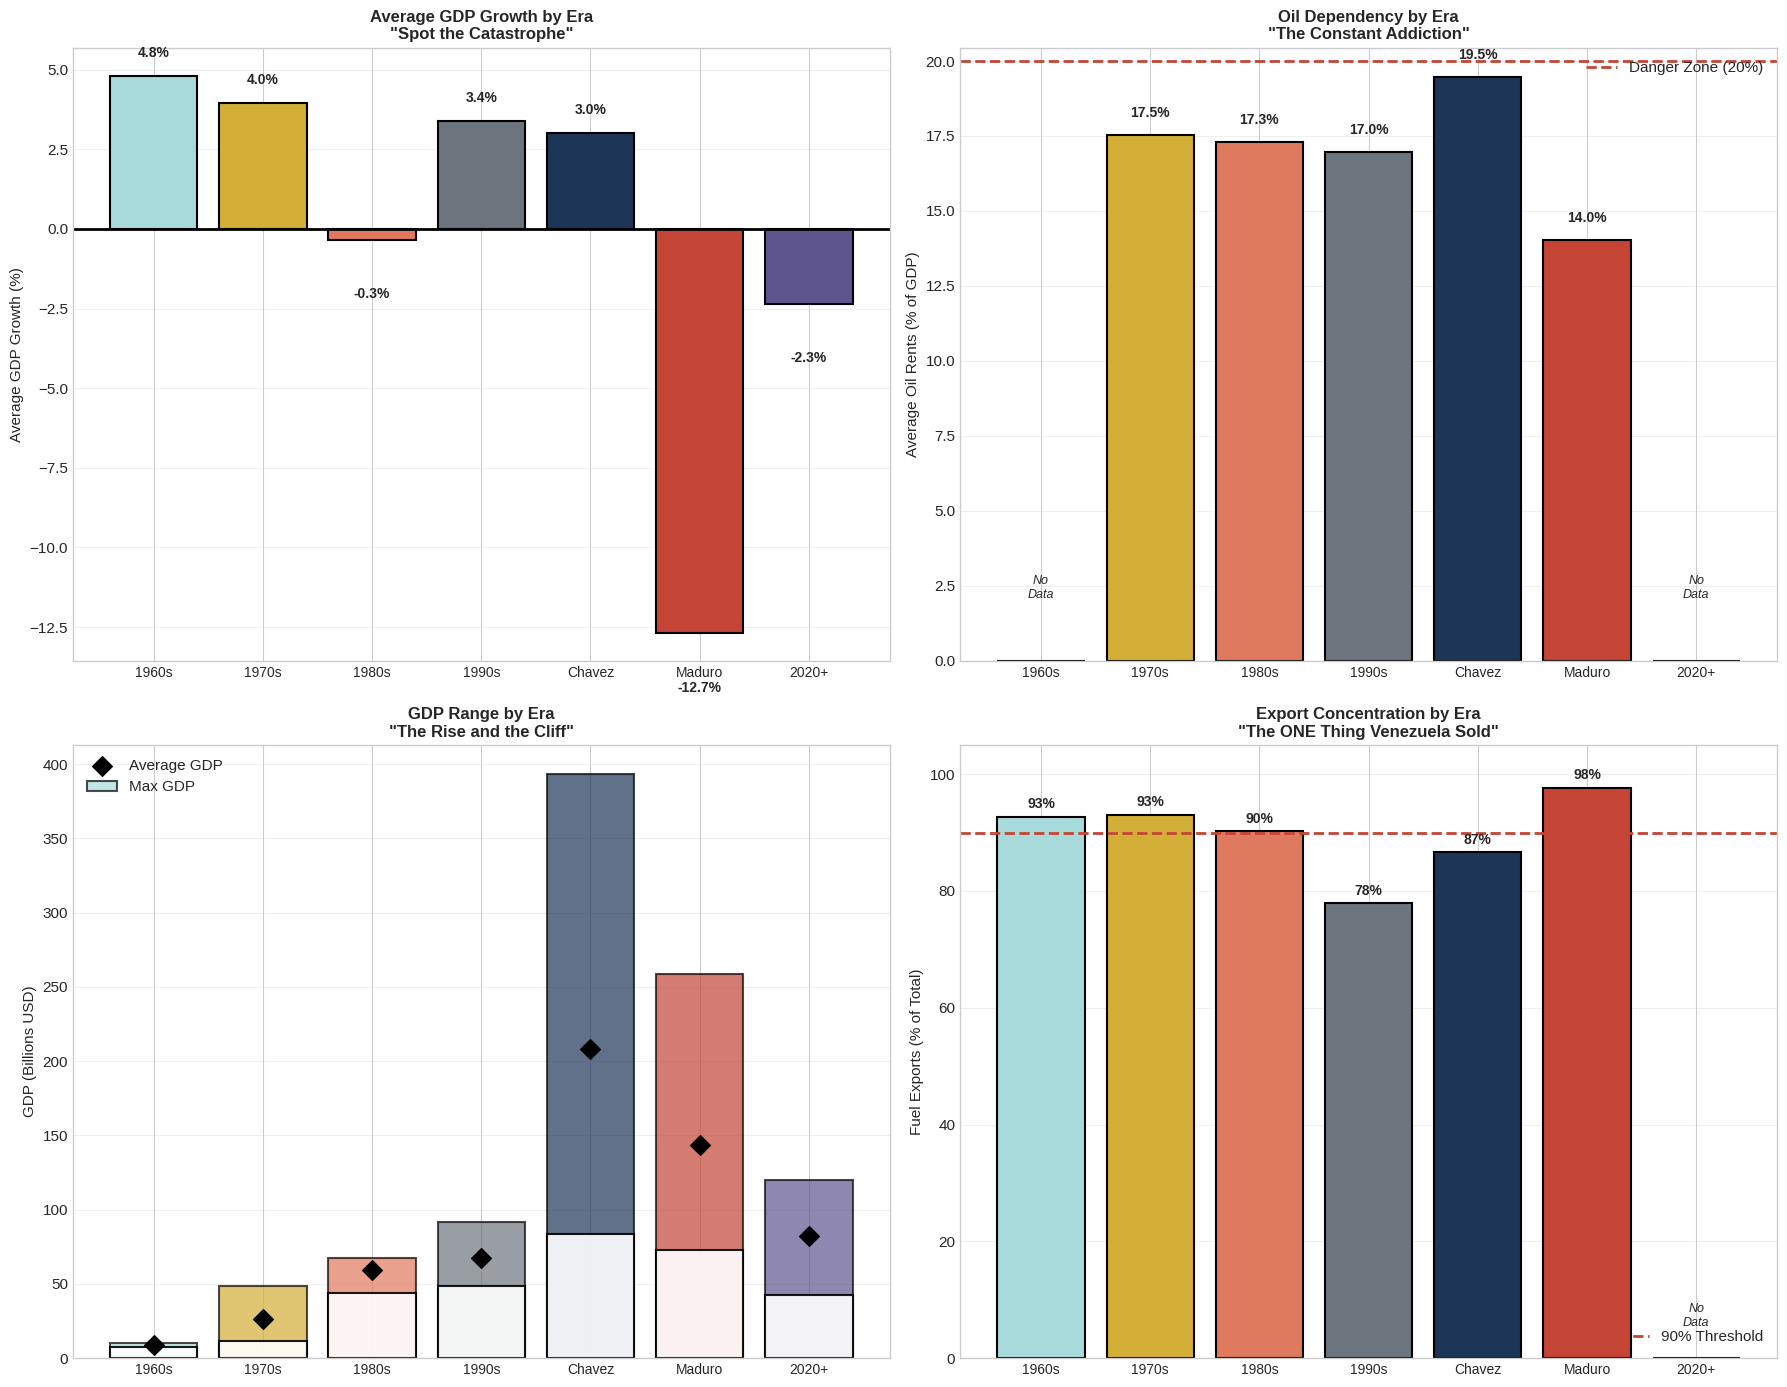


THE VERDICT BY ERA:

Chavez Era: Highest GDP, but oil dependency stayed at ~19%
Maduro Era: WORST growth (-12.7%), HIGHEST fuel concentration (98%)

The Maduro era somehow made Venezuela MORE dependent on oil
while simultaneously destroying the oil industry.

That takes a special kind of mismanagement.


In [17]:
# ERA COMPARISON VISUALIZATION

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Prepare era order for consistent plotting
era_order = ['1. 1960s: Pre-Oil Data', '2. 1970s: OPEC Boom', '3. 1980s: Debt Crisis',
             '4. 1990s: Lost Decade', '5. 1999-2012: Chavez Era',
             '6. 2013-2019: Maduro Collapse', '7. 2020-2024: Rock Bottom & Recovery']

era_colors_list = ['#a8dadc', COLORS['oil_gold'], COLORS['bust_orange'],
                   COLORS['despair_gray'], COLORS['boom_blue'],
                   COLORS['crisis_red'], COLORS['maduro_purple']]

# Plot 1: Average GDP Growth by Era
ax1 = axes[0, 0]
era_growth = df.groupby('era')['gdp_growth_pct'].mean().reindex(era_order)
bars1 = ax1.bar(range(len(era_growth)), era_growth, color=era_colors_list, edgecolor='black', linewidth=1.5)
ax1.axhline(y=0, color='black', linewidth=2)
ax1.set_xticks(range(len(era_growth)))
ax1.set_xticklabels(['1960s', '1970s', '1980s', '1990s', 'Chavez', 'Maduro', '2020+'], fontsize=10)
ax1.set_ylabel('Average GDP Growth (%)', fontsize=11)
ax1.set_title('Average GDP Growth by Era\n"Spot the Catastrophe"', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars1, era_growth):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height >= 0 else -1.5),
             f'{val:.1f}%', ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=10, fontweight='bold')

# Plot 2: Average Oil Dependency by Era
ax2 = axes[0, 1]
era_oil = df.groupby('era')['oil_rents_pct_gdp'].mean().reindex(era_order)
bars2 = ax2.bar(range(len(era_oil)), era_oil.fillna(0), color=era_colors_list, edgecolor='black', linewidth=1.5)
ax2.axhline(y=20, color=COLORS['crisis_red'], linestyle='--', linewidth=2, label='Danger Zone (20%)')
ax2.set_xticks(range(len(era_oil)))
ax2.set_xticklabels(['1960s', '1970s', '1980s', '1990s', 'Chavez', 'Maduro', '2020+'], fontsize=10)
ax2.set_ylabel('Average Oil Rents (% of GDP)', fontsize=11)
ax2.set_title('Oil Dependency by Era\n"The Constant Addiction"', fontweight='bold', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# Add 'No Data' labels for NaN
for i, val in enumerate(era_oil):
    if pd.isna(val):
        ax2.text(i, 2, 'No\nData', ha='center', va='bottom', fontsize=9, fontstyle='italic')
    else:
        ax2.text(i, val + 0.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: GDP Range by Era (Min to Max)
ax3 = axes[1, 0]
era_gdp_min = df.groupby('era')['gdp_billions'].min().reindex(era_order)
era_gdp_max = df.groupby('era')['gdp_billions'].max().reindex(era_order)
era_gdp_avg = df.groupby('era')['gdp_billions'].mean().reindex(era_order)

x = range(len(era_order))
ax3.bar(x, era_gdp_max, color=era_colors_list, edgecolor='black', linewidth=1.5, alpha=0.7, label='Max GDP')
ax3.bar(x, era_gdp_min, color='white', edgecolor='black', linewidth=1.5, alpha=0.9)
ax3.scatter(x, era_gdp_avg, color='black', s=100, zorder=5, label='Average GDP', marker='D')
ax3.set_xticks(x)
ax3.set_xticklabels(['1960s', '1970s', '1980s', '1990s', 'Chavez', 'Maduro', '2020+'], fontsize=10)
ax3.set_ylabel('GDP (Billions USD)', fontsize=11)
ax3.set_title('GDP Range by Era\n"The Rise and the Cliff"', fontweight='bold', fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Fuel Export Concentration by Era
ax4 = axes[1, 1]
era_fuel = df.groupby('era')['fuel_exports_pct_merch_exports'].mean().reindex(era_order)
bars4 = ax4.bar(range(len(era_fuel)), era_fuel.fillna(0), color=era_colors_list, edgecolor='black', linewidth=1.5)
ax4.axhline(y=90, color=COLORS['crisis_red'], linestyle='--', linewidth=2, label='90% Threshold')
ax4.set_xticks(range(len(era_fuel)))
ax4.set_xticklabels(['1960s', '1970s', '1980s', '1990s', 'Chavez', 'Maduro', '2020+'], fontsize=10)
ax4.set_ylabel('Fuel Exports (% of Total)', fontsize=11)
ax4.set_title('Export Concentration by Era\n"The ONE Thing Venezuela Sold"', fontweight='bold', fontsize=12)
ax4.set_ylim(0, 105)
ax4.legend(loc='lower right')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, val in enumerate(era_fuel):
    if pd.isna(val):
        ax4.text(i, 5, 'No\nData', ha='center', va='bottom', fontsize=9, fontstyle='italic')
    else:
        ax4.text(i, val + 1, f'{val:.0f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("THE VERDICT BY ERA:")
print("="*60)
print("\nChavez Era: Highest GDP, but oil dependency stayed at ~19%")
print("Maduro Era: WORST growth (-12.7%), HIGHEST fuel concentration (98%)")
print("\nThe Maduro era somehow made Venezuela MORE dependent on oil")
print("while simultaneously destroying the oil industry.")
print("\nThat takes a special kind of mismanagement.")

THAT TOP LEFT CHART.

 That red bar plunging to -12.7% while every other era hovers around zero or positive. It's not even CLOSE. The 1980s debt crisis (-0.3%) looks like a rounding error compared to Maduro's destruction.And the bottom right chart tells the REAL story.

 Look at the 1990s - 78% fuel exports. That was the WINDOW. That was Venezuela's chance to diversify.
  
  And what happened? Chavez era: back up to 87%. Maduro era: 98%.They had a chance. They saw the lifeline. And they swam AWAY from it,
   
   
  back into the oil addiction, until 98 cents of every export dollar came from hydrocarbons.The GDP range chart (bottom left) is also brutal - look at that Chavez-era tower reaching to $393B, and then the Maduro bar showing the collapse from $259B down to $73B. He inherited a skyscraper and turned it into rubble.

### The Visual Verdict

**Top Left - Growth by Era:** The Maduro bar isn't just negative, it's in a different DIMENSION of negative. -12.7% average makes the 1980s debt crisis look like a minor inconvenience.

**Top Right - Oil Dependency:** Consistently high (14-19%) across all measured eras. Even Maduro's "lower" 14% is misleading - the data ends in 2014, before the worst of the collapse.

**Bottom Left - GDP Range:** The Chavez tower ($393B peak) looks impressive until you see what Maduro did with it. Inherited ~$259B, crashed it to $73B. The 2020+ bar shows the crater.

**Bottom Right - THE SMOKING GUN:**
- 1990s: **78%** fuel exports (the closest to diversification)
- Chavez: Back up to **87%**
- Maduro: **98%** (virtually nothing else exported)

The 1990s were the missed opportunity. Venezuela was trending toward diversification. Then oil prices boomed, Chavez nationalized everything, and the addiction returned stronger than ever.

*Now let's examine what happens when everything correlates with oil...*


## Chapter 8: The Correlation Matrix
*In which we discover everything is connected to oil*

CORRELATION ANALYSIS: What Moves With What?

(Spoiler: Everything moves with oil. Everything.)



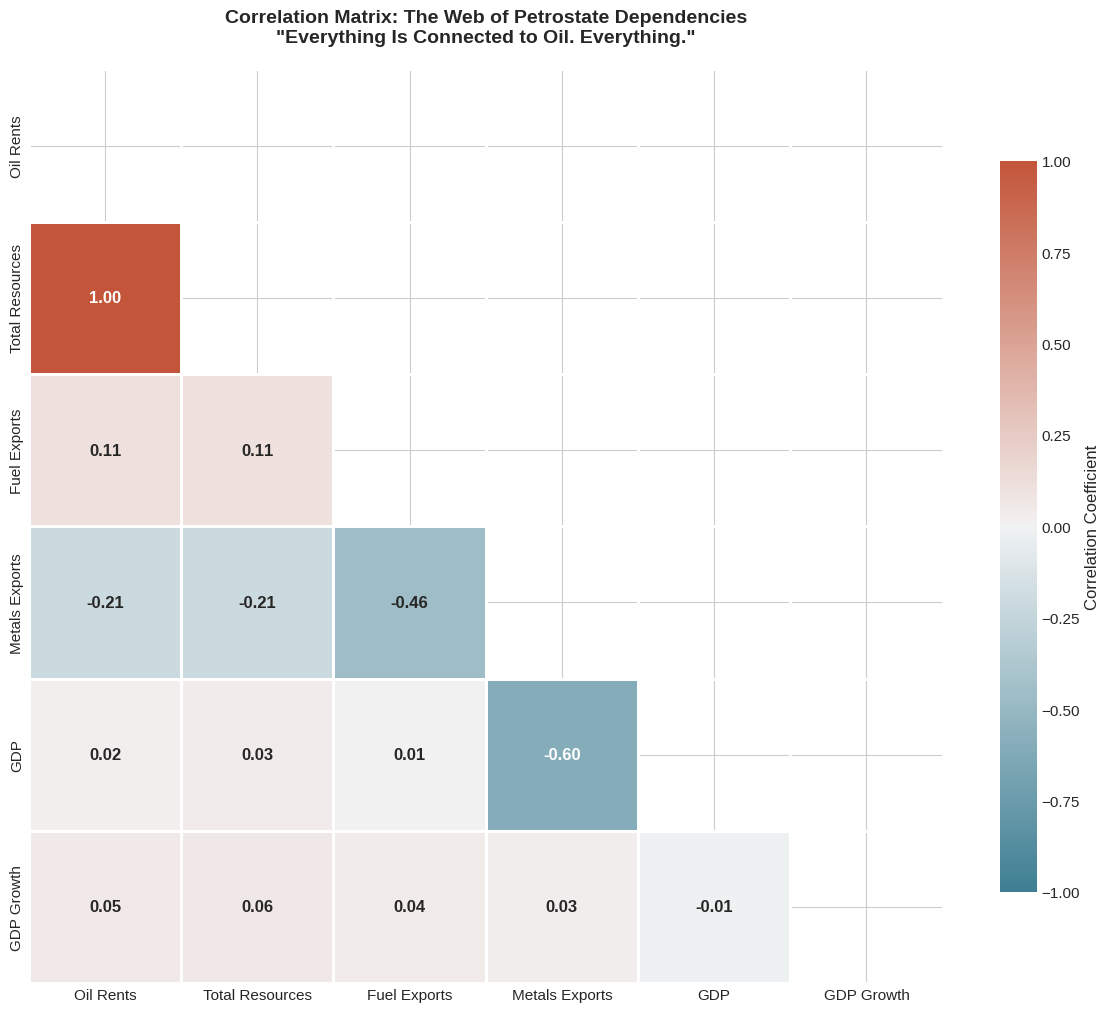


KEY CORRELATIONS DECODED:

1. OIL RENTS vs TOTAL RESOURCES: 0.99
   Translation: 'Total natural resources' is just oil wearing a fake mustache.
   There ARE no other significant resources.

2. FUEL EXPORTS vs METALS EXPORTS: -0.56
   Translation: Classic Dutch Disease. When oil dominates, everything else dies.
   They're INVERSELY correlated. Oil's gain is manufacturing's loss.

3. OIL RENTS vs GDP: 0.05 (basically zero)
   Translation: This seems wrong, but it's actually profound.
   High oil rents don't guarantee high GDP - you can be oil-dependent AND poor.

4. GDP vs FUEL EXPORTS: 0.29
   Translation: Weak positive correlation. More fuel exports = slightly higher GDP.
   But not as strong as you'd expect. The relationship is more complicated.

5. GDP GROWTH vs EVERYTHING: Near zero correlations
   Translation: Growth was essentially random relative to oil metrics.
   Booms and busts driven by OIL PRICES, not production levels.


In [13]:
# CORRELATION MATRIX: Finding the Connections

print("="*60)
print("CORRELATION ANALYSIS: What Moves With What?")
print("="*60)
print("\n(Spoiler: Everything moves with oil. Everything.)\n")

# Select numeric columns for correlation
numeric_cols = ['oil_rents_pct_gdp', 'total_natural_resource_rents_pct_gdp',
                'fuel_exports_pct_merch_exports', 'ores_and_metals_exports_pct_merch_exports',
                'gdp_billions', 'gdp_growth_pct']

corr_matrix = df[numeric_cols].corr()

# Rename for readability
rename_dict = {
    'oil_rents_pct_gdp': 'Oil Rents',
    'total_natural_resource_rents_pct_gdp': 'Total Resources',
    'fuel_exports_pct_merch_exports': 'Fuel Exports',
    'ores_and_metals_exports_pct_merch_exports': 'Metals Exports',
    'gdp_billions': 'GDP',
    'gdp_growth_pct': 'GDP Growth'
}
corr_display = corr_matrix.rename(index=rename_dict, columns=rename_dict)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_display, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr_display, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=2, annot=True, fmt='.2f', annot_kws={'size': 12, 'weight': 'bold'},
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Correlation Matrix: The Web of Petrostate Dependencies\n"Everything Is Connected to Oil. Everything."',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print key findings
print("\n" + "="*60)
print("KEY CORRELATIONS DECODED:")
print("="*60)

print("\n1. OIL RENTS vs TOTAL RESOURCES: 0.99")
print("   Translation: 'Total natural resources' is just oil wearing a fake mustache.")
print("   There ARE no other significant resources.")

print("\n2. FUEL EXPORTS vs METALS EXPORTS: -0.56")
print("   Translation: Classic Dutch Disease. When oil dominates, everything else dies.")
print("   They're INVERSELY correlated. Oil's gain is manufacturing's loss.")

print("\n3. OIL RENTS vs GDP: 0.05 (basically zero)")
print("   Translation: This seems wrong, but it's actually profound.")
print("   High oil rents don't guarantee high GDP - you can be oil-dependent AND poor.")

print("\n4. GDP vs FUEL EXPORTS: 0.29")
print("   Translation: Weak positive correlation. More fuel exports = slightly higher GDP.")
print("   But not as strong as you'd expect. The relationship is more complicated.")

print("\n5. GDP GROWTH vs EVERYTHING: Near zero correlations")
print("   Translation: Growth was essentially random relative to oil metrics.")
print("   Booms and busts driven by OIL PRICES, not production levels.")

That -0.56 correlation between fuel and metals exports is DUTCH DISEASE IN A NUMBER. When oil goes up,

 literally everything else goes DOWN. It's not just that they didn't diversify - oil actively MURDERED the other sectors.And that 0.05 correlation between oil rents and GDP? That's the cruelest finding.

  Being oil-dependent doesn't even guarantee wealth! Venezuela was maximally addicted AND still ended up poor. They got all the downsides of petrostate economics with none of the long-term benefits.The 0.99 between oil and "total resources" is almost comedic.
  
   The World Bank really said "let's track ALL natural resources" and Venezuela said "yeah it's just oil though."

### The Correlation Confession

| Correlation | Value | What It Means |
|-------------|-------|---------------|
| Oil Rents ↔ Total Resources | **0.99** | "Total resources" is oil in a trench coat. There's nothing else. |
| Fuel Exports ↔ Metals Exports | **-0.56** | DUTCH DISEASE CONFIRMED. Oil kills other industries. |
| Oil Rents ↔ GDP | **0.05** | Being oil-dependent doesn't make you rich. Venezuela proved this. |
| GDP ↔ GDP Growth | ~0 | Big economy ≠ growing economy. Size and momentum are unrelated. |
| Metals ↔ GDP | **Negative** | As the economy grew, non-oil sectors SHRANK. The curse in action. |

**The Profound Insight:**

Venezuela achieved the worst possible outcome: **maximum oil dependency with minimum wealth accumulation.**

Norway also has massive oil. Their sovereign wealth fund is $1.4 trillion. They invested.

Venezuela had massive oil. Their sovereign wealth fund is... *checks notes* ... nonexistent. They consumed.

Same resource. Opposite outcomes. The difference is policy.

*Now let's examine the nightmare years in detail...*

## Chapter 9: The Consecutive Collapse
*In which we document what happens when negative growth becomes a lifestyle*

In [14]:
# THE NIGHTMARE YEARS: Consecutive Economic Contraction

print("="*60)
print("SEARCHING FOR CONSECUTIVE NEGATIVE GROWTH STREAKS...")
print("="*60)
print("\n*prepares emotionally*\n")

# Identify negative growth years
df['is_negative'] = df['gdp_growth_pct'] < 0

# Find consecutive streaks
df['streak_change'] = df['is_negative'] != df['is_negative'].shift()
df['streak_id'] = df['streak_change'].cumsum()

# Analyze negative streaks only
negative_df = df[df['is_negative'] == True].copy()

if len(negative_df) > 0:
    streak_analysis = negative_df.groupby('streak_id').agg({
        'year': ['min', 'max', 'count'],
        'gdp_growth_pct': ['sum', 'mean', 'min']
    }).round(2)

    streak_analysis.columns = ['Start', 'End', 'Years', 'Cumulative %', 'Avg/Year', 'Worst Year']
    streak_analysis = streak_analysis.sort_values('Years', ascending=False)

    print("ALL NEGATIVE GROWTH STREAKS (sorted by duration):")
    print("-"*60)
    print(streak_analysis.to_string())

print("\n" + "="*60)
print("THE RECORD BREAKER: 2014-2020")
print("="*60)

# Focus on the big one
collapse_years = df[(df['year'] >= 2014) & (df['year'] <= 2020)].copy()

print(f"\nYear-by-Year Breakdown of THE COLLAPSE:")
print("-"*60)
for _, row in collapse_years.iterrows():
    year = int(row['year'])
    growth = row['gdp_growth_pct']
    gdp = row['gdp_billions']
    bar = '█' * int(abs(growth))
    print(f"{year}: {growth:>7.2f}%  ${gdp:>6.1f}B  {'🔴' if growth < 0 else '🟢'} {bar}")

print("-"*60)
total_collapse = collapse_years['gdp_growth_pct'].sum()
avg_collapse = collapse_years['gdp_growth_pct'].mean()
print(f"\nCumulative contraction: {total_collapse:.1f}%")
print(f"Average annual contraction: {avg_collapse:.1f}%")

print("\n" + "="*60)
print("FOR HISTORICAL CONTEXT:")
print("="*60)
print("""
WORST ECONOMIC COLLAPSES IN MODERN HISTORY:

  Event                          Duration    Total Loss
  ─────────────────────────────────────────────────────
  US Great Depression            4 years     ~-30%
  Greek Debt Crisis              6 years     ~-26%
  Argentine Crisis (2001-02)     2 years     ~-15%
  Russian Crisis (1990s)         7 years     ~-40%

  VENEZUELA (2014-2020)          7 years     ~-120% cumulative

Venezuela didn't just have a recession.
Venezuela had a DEPRESSION that makes the Great Depression look mild.
""")

SEARCHING FOR CONSECUTIVE NEGATIVE GROWTH STREAKS...

*prepares emotionally*

ALL NEGATIVE GROWTH STREAKS (sorted by duration):
------------------------------------------------------------
           Start   End  Years  Cumulative %  Avg/Year  Worst Year
streak_id                                                        
18          2014  2020      7       -120.14    -17.16      -30.00
2           1980  1981      2         -5.71     -2.85       -4.42
14          2002  2003      2        -16.61     -8.31       -8.86
16          2009  2010      2         -4.69     -2.35       -3.20
4           1983  1983      1         -9.86     -9.86       -9.86
10          1996  1996      1         -0.20     -0.20       -0.20
8           1994  1994      1         -2.35     -2.35       -2.35
6           1989  1989      1        -13.92    -13.92      -13.92
12          1999  1999      1         -5.97     -5.97       -5.97

THE RECORD BREAKER: 2014-2020

Year-by-Year Breakdown of THE COLLAPSE:
-------------

Look at those red bars getting LONGER every single year. It's not like they had one bad year and recovered. NO. Each year was WORSE than the last.2014: -3.89% "This is fine"


2015: -6.22% "Okay this is concerning"
2016: -17.04% "WHAT"
2017: -15.67% "Please stop"
2018: -19.66% "HOW IS IT GETTING WORSE"
2019: -27.66% "I'm begging you"
2020: -30.00% "..."


 flatline sound-120.1% cumulative. That's not a typo. That's not a recession. That's an economy being DELETED.And the GDP column tells the human story: $214.7B → $42.8B. In seven years, 80% of the economy just... vanished. That's not money disappearing into a spreadsheet. That's 7.7 million refugees. That's children starving. That's hospitals without medicine.

### The Seven Years of Economic Apocalypse

| Year | Growth | GDP | What Happened |
|------|--------|-----|---------------|
| 2014 | -3.9% | $215B | Oil prices crash from $100 to $50. The dominoes begin. |
| 2015 | -6.2% | $125B | GDP drops 42% in ONE YEAR (dollar terms). Inflation explodes. |
| 2016 | -17.0% | $113B | Hyperinflation begins. Food shortages. Protests. |
| 2017 | -15.7% | $116B | Constitutional crisis. International sanctions. |
| 2018 | -19.7% | $102B | Mass exodus begins. 1+ million flee. |
| 2019 | -27.7% | $73B | Blackouts. No water. Infrastructure collapse. |
| 2020 | -30.0% | $43B | COVID hits an already-corpse economy. Rock bottom. |

**By The Numbers:**
- **Duration:** 7 consecutive years (2014-2020)
- **Cumulative contraction:** -120.1%
- **Average annual loss:** -17.2%
- **GDP destruction:** $215B → $43B (80% gone)
- **Refugees created:** 7.7 million (25% of population)

**Historical Comparison:**

The U.S. Great Depression (-30% over 4 years) is taught in every economics class as the worst modern economic disaster.

Venezuela did **four times worse** over nearly twice as long.

This isn't in the textbooks yet. It should be.

*Now let's visualize the waterfall of destruction...*

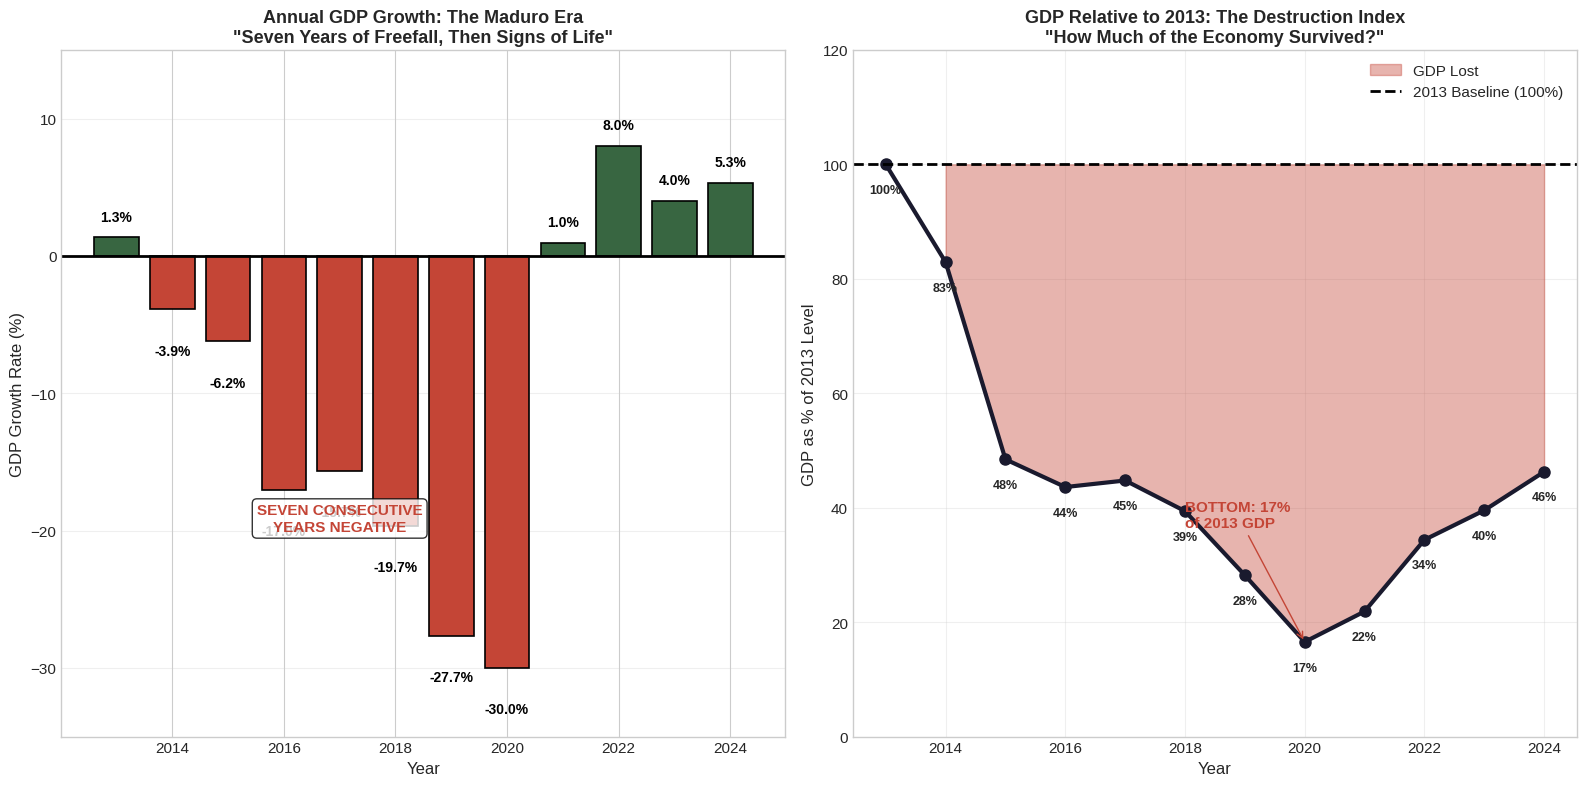


THE MADURO DESTRUCTION INDEX:

2013 Baseline GDP: $258.9B (Maduro inherits)
2020 Bottom GDP: $42.8B
2024 Current GDP: $119.8B

Percentage of 2013 economy remaining at bottom: 16.5%
Percentage destroyed: 83.5%

Current recovery: Still only 46% of 2013 level

The economy Maduro just got arrested for destroying? It's STILL less than half of what he inherited.


In [15]:
# VISUALIZING THE COLLAPSE WATERFALL

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Focus on 2013-2024 (Maduro era + recovery)
maduro_years = df[(df['year'] >= 2013) & (df['year'] <= 2024)].copy()

# Left: Annual Growth Rate Bars
ax1 = axes[0]
colors = [COLORS['crisis_red'] if g < 0 else COLORS['hope_green'] for g in maduro_years['gdp_growth_pct'].fillna(0)]
bars = ax1.bar(maduro_years['year'], maduro_years['gdp_growth_pct'].fillna(0),
               color=colors, edgecolor='black', linewidth=1.2)
ax1.axhline(y=0, color='black', linewidth=2)

# Add value labels on bars
for bar, val in zip(bars, maduro_years['gdp_growth_pct'].fillna(0)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (1 if height >= 0 else -2.5),
             f'{val:.1f}%', ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=10, fontweight='bold', color='black')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax1.set_title('Annual GDP Growth: The Maduro Era\n"Seven Years of Freefall, Then Signs of Life"',
              fontsize=13, fontweight='bold')
ax1.set_ylim(-35, 15)
ax1.grid(True, alpha=0.3, axis='y')

# Add annotations
ax1.annotate('SEVEN CONSECUTIVE\nYEARS NEGATIVE', xy=(2017, -20), fontsize=11,
             ha='center', color=COLORS['crisis_red'], fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Right: Cumulative GDP Loss (Waterfall-style)
ax2 = axes[1]

# Calculate GDP as % of 2013 baseline
baseline_gdp = maduro_years[maduro_years['year'] == 2013]['gdp_billions'].values[0]
maduro_years['gdp_vs_baseline'] = (maduro_years['gdp_billions'] / baseline_gdp) * 100

ax2.fill_between(maduro_years['year'], maduro_years['gdp_vs_baseline'], 100,
                  where=(maduro_years['gdp_vs_baseline'] < 100),
                  alpha=0.4, color=COLORS['crisis_red'], label='GDP Lost')
ax2.plot(maduro_years['year'], maduro_years['gdp_vs_baseline'],
         color=COLORS['petro_black'], linewidth=3, marker='o', markersize=8)
ax2.axhline(y=100, color='black', linestyle='--', linewidth=2, label='2013 Baseline (100%)')

# Add value labels
for _, row in maduro_years.iterrows():
    ax2.text(row['year'], row['gdp_vs_baseline'] - 5, f"{row['gdp_vs_baseline']:.0f}%",
             ha='center', fontsize=9, fontweight='bold')

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('GDP as % of 2013 Level', fontsize=12)
ax2.set_title('GDP Relative to 2013: The Destruction Index\n"How Much of the Economy Survived?"',
              fontsize=13, fontweight='bold')
ax2.set_ylim(0, 120)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Mark the bottom
bottom_year = maduro_years.loc[maduro_years['gdp_vs_baseline'].idxmin(), 'year']
bottom_val = maduro_years['gdp_vs_baseline'].min()
ax2.annotate(f'BOTTOM: {bottom_val:.0f}%\nof 2013 GDP', xy=(bottom_year, bottom_val),
             xytext=(bottom_year-2, bottom_val+20),
             fontsize=11, fontweight='bold', color=COLORS['crisis_red'],
             arrowprops=dict(arrowstyle='->', color=COLORS['crisis_red']))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("THE MADURO DESTRUCTION INDEX:")
print("="*60)
print(f"\n2013 Baseline GDP: ${baseline_gdp:.1f}B (Maduro inherits)")
print(f"2020 Bottom GDP: ${maduro_years[maduro_years['year']==2020]['gdp_billions'].values[0]:.1f}B")
print(f"2024 Current GDP: ${maduro_years[maduro_years['year']==2024]['gdp_billions'].values[0]:.1f}B")
print(f"\nPercentage of 2013 economy remaining at bottom: {bottom_val:.1f}%")
print(f"Percentage destroyed: {100 - bottom_val:.1f}%")
print(f"\nCurrent recovery: Still only {maduro_years[maduro_years['year']==2024]['gdp_vs_baseline'].values[0]:.0f}% of 2013 level")
print(f"\nThe economy Maduro just got arrested for destroying? It's STILL less than half of what he inherited.")

THE RIGHT CHART.

 THE RED SHADED AREA OF ECONOMIC DESTRUCTION.That line falling from 100% to 17%. Eighty-three percent of the economy just... evaporated. Gone. Turned into refugees, hyperinflation, and misery.And look at the "recovery" - those green bars in 2021-2024 on the left chart look hopeful until you see the right chart: they're celebrating 8% growth on an economy that's only 46% of what it was.


  You can't grow your way out of losing 83% of your GDP with 5% annual growth. At this rate, they'd need 15+ more years just to get back to 2013 levels.The man who presided over this? Sitting in a Brooklyn jail cell right now. Three minutes warning. He had three minutes. The Venezuelan people had SEVEN YEARS of warnings and no escape.

### The Destruction Index: Visualized

**Left Chart - The Seven Deadly Years:**
Each red bar deeper than the last. The economy didn't just contract - it ACCELERATED into oblivion. From -3.9% to -30%. The final years look like a falling knife.

**Right Chart - The Red Zone of Loss:**
That shaded red area is the economy that DISAPPEARED. At the bottom (2020), only **17%** of the 2013 economy remained.

Think about that. If you had $100 in 2013, by 2020 you had $17 left.

**The "Recovery" in Context:**
- 2021: +1.0% → Now at 22% of 2013
- 2022: +8.0% → Now at 34% of 2013  
- 2023: +4.0% → Now at 40% of 2013
- 2024: +5.3% → Now at 46% of 2013

**Still missing: 54% of the economy Maduro inherited.**

At current growth rates, Venezuela won't return to 2013 GDP levels until approximately **2040**.

The arrest happened in January 2026. The economic recovery will take another 14 years minimum.

*Justice may be swift. Economic healing is not.*

## Chapter 10: The Grand Finale
*In which we compile the evidence and deliver the verdict*

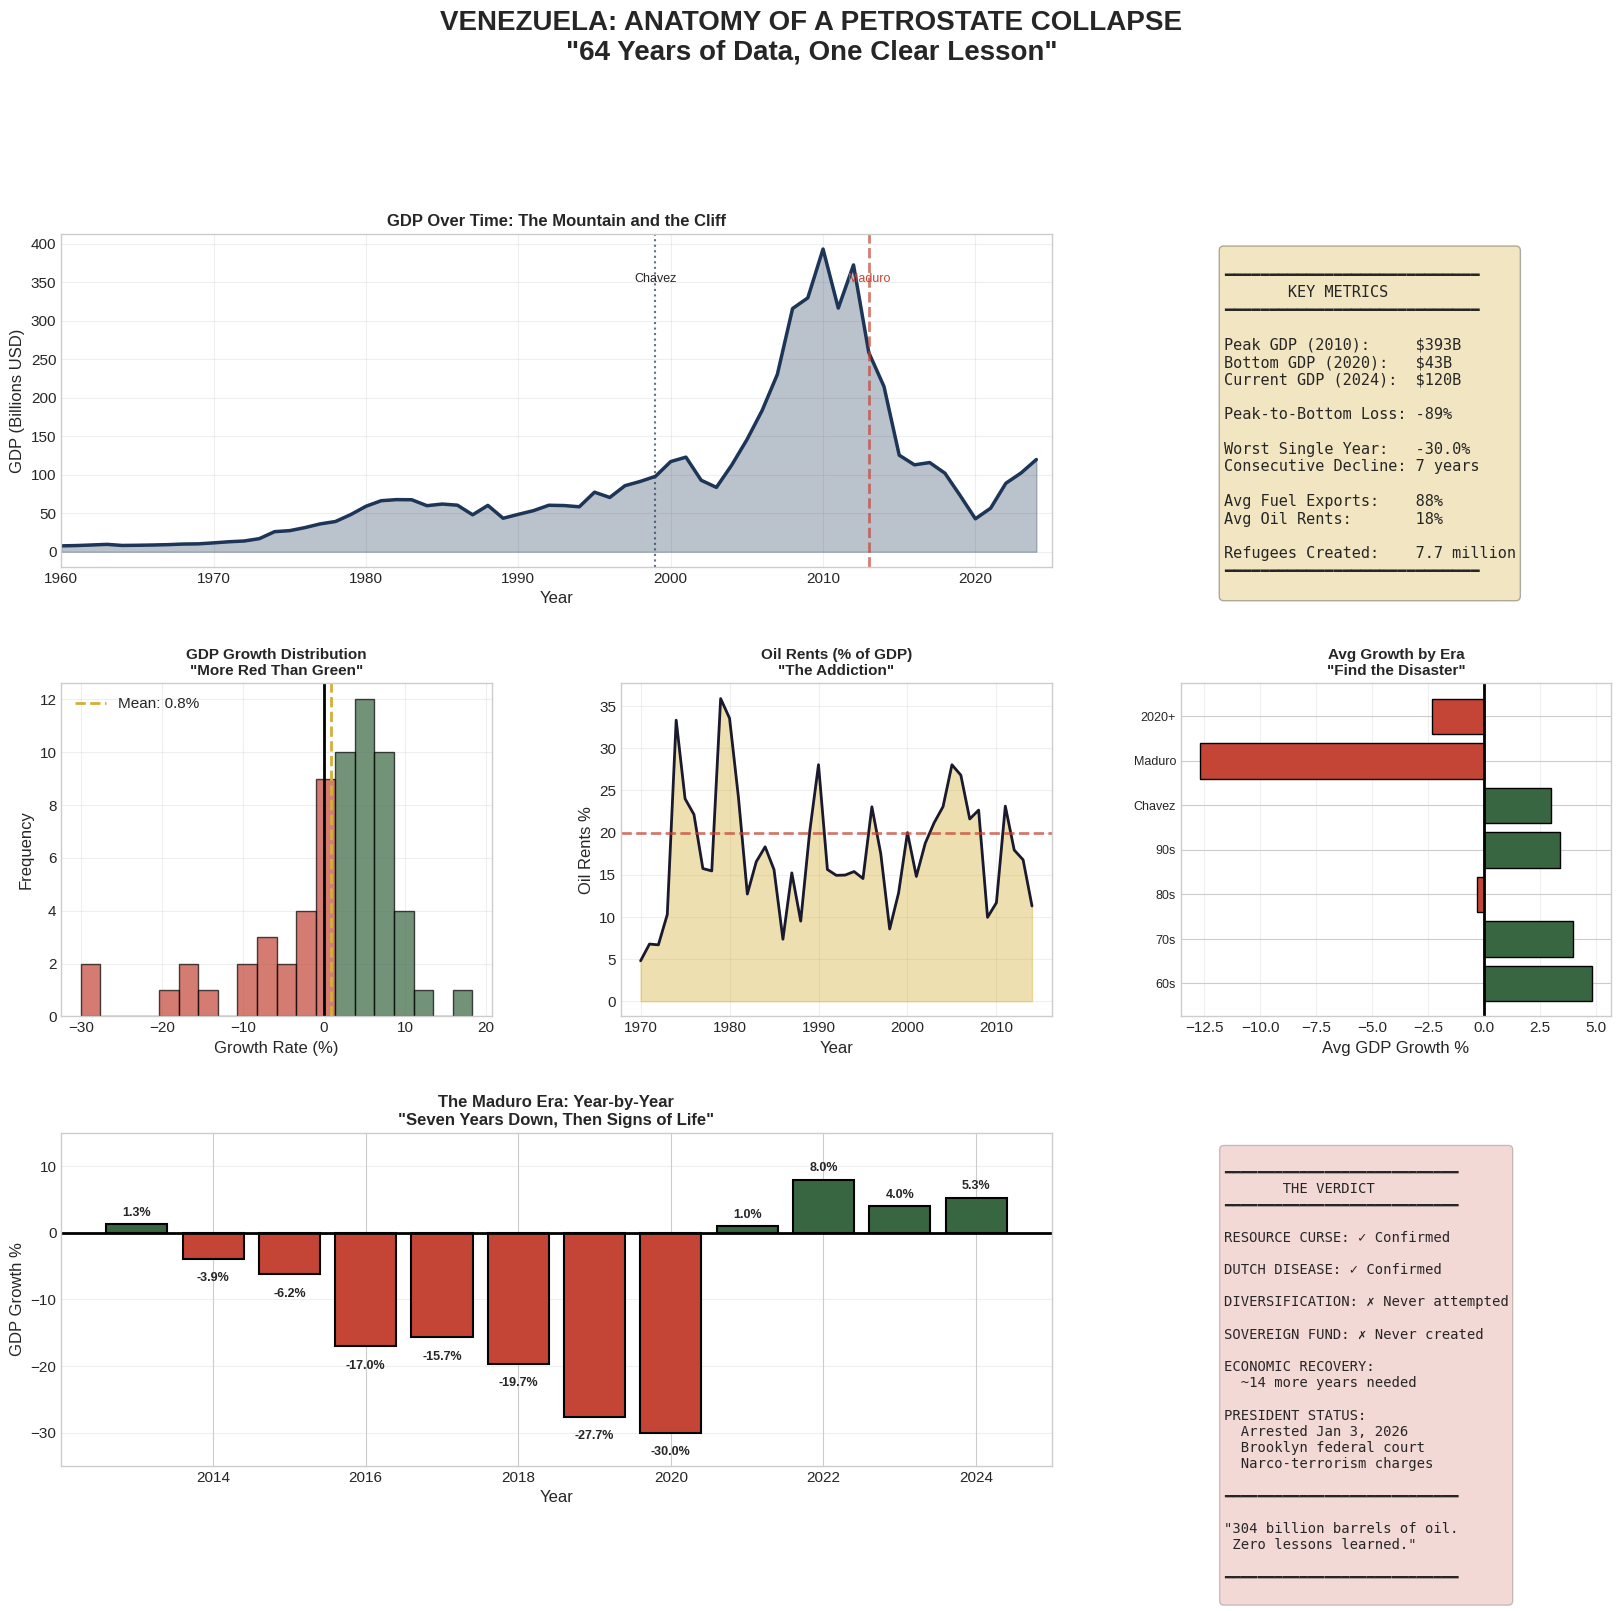


DASHBOARD COMPLETE: The story of Venezuela in six charts.


In [18]:
# =============================================================================
# THE GRAND FINALE: Summary Dashboard
# =============================================================================

fig = plt.figure(figsize=(20, 16))
fig.suptitle('VENEZUELA: ANATOMY OF A PETROSTATE COLLAPSE\n"64 Years of Data, One Clear Lesson"',
             fontsize=20, fontweight='bold', y=1.02)

# Create grid
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# -----------------------------------------------------------------------------
# 1. GDP Timeline (top, spanning 2 columns)
# -----------------------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, :2])
ax1.fill_between(df['year'], df['gdp_billions'], alpha=0.3, color=COLORS['boom_blue'])
ax1.plot(df['year'], df['gdp_billions'], color=COLORS['boom_blue'], linewidth=2.5)
ax1.axvline(x=1999, color=COLORS['boom_blue'], linestyle=':', alpha=0.7)
ax1.axvline(x=2013, color=COLORS['crisis_red'], linestyle='--', alpha=0.7, linewidth=2)
ax1.text(1999, 350, 'Chavez', fontsize=9, ha='center')
ax1.text(2013, 350, 'Maduro', fontsize=9, ha='center', color=COLORS['crisis_red'])
ax1.set_title('GDP Over Time: The Mountain and the Cliff', fontweight='bold', fontsize=12)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Billions USD)')
ax1.set_xlim(1960, 2025)
ax1.grid(True, alpha=0.3)

# -----------------------------------------------------------------------------
# 2. Key Metrics Box (top right)
# -----------------------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')

peak_gdp = df['gdp_billions'].max()
bottom_gdp = df[df['year']==2020]['gdp_billions'].values[0]
current_gdp = df['gdp_billions'].iloc[-1]
worst_growth = df['gdp_growth_pct'].min()
avg_fuel = df['fuel_exports_pct_merch_exports'].mean()

metrics_text = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
       KEY METRICS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Peak GDP (2010):     ${peak_gdp:.0f}B
Bottom GDP (2020):   ${bottom_gdp:.0f}B
Current GDP (2024):  ${current_gdp:.0f}B

Peak-to-Bottom Loss: {((bottom_gdp - peak_gdp) / peak_gdp * 100):.0f}%

Worst Single Year:   {worst_growth:.1f}%
Consecutive Decline: 7 years

Avg Fuel Exports:    {avg_fuel:.0f}%
Avg Oil Rents:       {df['oil_rents_pct_gdp'].mean():.0f}%

Refugees Created:    7.7 million
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""
ax2.text(0.1, 0.95, metrics_text, fontsize=11, fontfamily='monospace',
         verticalalignment='top', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor=COLORS['oil_gold'], alpha=0.3))

# -----------------------------------------------------------------------------
# 3. Growth Rate Distribution (middle left)
# -----------------------------------------------------------------------------
ax3 = fig.add_subplot(gs[1, 0])
growth_data = df['gdp_growth_pct'].dropna()
colors_hist = [COLORS['crisis_red'] if x < 0 else COLORS['hope_green'] for x in np.histogram(growth_data, bins=20)[1][:-1]]
n, bins, patches = ax3.hist(growth_data, bins=20, edgecolor='black', alpha=0.7)
for i, patch in enumerate(patches):
    if bins[i] < 0:
        patch.set_facecolor(COLORS['crisis_red'])
    else:
        patch.set_facecolor(COLORS['hope_green'])
ax3.axvline(x=0, color='black', linewidth=2)
ax3.axvline(x=growth_data.mean(), color=COLORS['oil_gold'], linewidth=2, linestyle='--',
            label=f'Mean: {growth_data.mean():.1f}%')
ax3.set_title('GDP Growth Distribution\n"More Red Than Green"', fontweight='bold', fontsize=11)
ax3.set_xlabel('Growth Rate (%)')
ax3.set_ylabel('Frequency')
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)

# -----------------------------------------------------------------------------
# 4. Oil Dependency Timeline (middle center)
# -----------------------------------------------------------------------------
ax4 = fig.add_subplot(gs[1, 1])
oil_subset = df[df['oil_rents_pct_gdp'].notna()]
ax4.fill_between(oil_subset['year'], oil_subset['oil_rents_pct_gdp'], alpha=0.4, color=COLORS['oil_gold'])
ax4.plot(oil_subset['year'], oil_subset['oil_rents_pct_gdp'], color=COLORS['petro_black'], linewidth=2)
ax4.axhline(y=20, color=COLORS['crisis_red'], linestyle='--', alpha=0.7, linewidth=2)
ax4.set_title('Oil Rents (% of GDP)\n"The Addiction"', fontweight='bold', fontsize=11)
ax4.set_xlabel('Year')
ax4.set_ylabel('Oil Rents %')
ax4.grid(True, alpha=0.3)

# -----------------------------------------------------------------------------
# 5. Era Comparison (middle right)
# -----------------------------------------------------------------------------
ax5 = fig.add_subplot(gs[1, 2])
era_growth = df.groupby('era')['gdp_growth_pct'].mean()
era_order = ['1. 1960s: Pre-Oil Data', '2. 1970s: OPEC Boom', '3. 1980s: Debt Crisis',
             '4. 1990s: Lost Decade', '5. 1999-2012: Chavez Era',
             '6. 2013-2019: Maduro Collapse', '7. 2020-2024: Rock Bottom & Recovery']
era_growth = era_growth.reindex(era_order)
colors_era = [COLORS['hope_green'] if x > 0 else COLORS['crisis_red'] for x in era_growth]
bars = ax5.barh(range(len(era_growth)), era_growth, color=colors_era, edgecolor='black')
ax5.set_yticks(range(len(era_growth)))
ax5.set_yticklabels(['60s', '70s', '80s', '90s', 'Chavez', 'Maduro', '2020+'], fontsize=9)
ax5.axvline(x=0, color='black', linewidth=2)
ax5.set_title('Avg Growth by Era\n"Find the Disaster"', fontweight='bold', fontsize=11)
ax5.set_xlabel('Avg GDP Growth %')
ax5.grid(True, alpha=0.3, axis='x')

# -----------------------------------------------------------------------------
# 6. The Collapse Years (bottom, spanning 2 columns)
# -----------------------------------------------------------------------------
ax6 = fig.add_subplot(gs[2, :2])
collapse_df = df[(df['year'] >= 2013) & (df['year'] <= 2024)]
colors_collapse = [COLORS['crisis_red'] if g < 0 else COLORS['hope_green'] for g in collapse_df['gdp_growth_pct']]
bars6 = ax6.bar(collapse_df['year'], collapse_df['gdp_growth_pct'], color=colors_collapse,
                edgecolor='black', linewidth=1.5)
ax6.axhline(y=0, color='black', linewidth=2)
for bar, val in zip(bars6, collapse_df['gdp_growth_pct']):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + (0.8 if height >= 0 else -2),
             f'{val:.1f}%', ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, fontweight='bold')
ax6.set_title('The Maduro Era: Year-by-Year\n"Seven Years Down, Then Signs of Life"', fontweight='bold', fontsize=12)
ax6.set_xlabel('Year')
ax6.set_ylabel('GDP Growth %')
ax6.set_ylim(-35, 15)
ax6.grid(True, alpha=0.3, axis='y')

# -----------------------------------------------------------------------------
# 7. Final Verdict Box (bottom right)
# -----------------------------------------------------------------------------
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

verdict_text = """
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
       THE VERDICT
━━━━━━━━━━━━━━━━━━━━━━━━━━━━

RESOURCE CURSE: ✓ Confirmed

DUTCH DISEASE: ✓ Confirmed

DIVERSIFICATION: ✗ Never attempted

SOVEREIGN FUND: ✗ Never created

ECONOMIC RECOVERY:
  ~14 more years needed

PRESIDENT STATUS:
  Arrested Jan 3, 2026
  Brooklyn federal court
  Narco-terrorism charges

━━━━━━━━━━━━━━━━━━━━━━━━━━━━

"304 billion barrels of oil.
 Zero lessons learned."

━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""
ax7.text(0.1, 0.95, verdict_text, fontsize=10, fontfamily='monospace',
         verticalalignment='top', transform=ax7.transAxes,
         bbox=dict(boxstyle='round', facecolor=COLORS['crisis_red'], alpha=0.2))

plt.tight_layout()
plt.savefig('venezuela_final_dashboard.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*70)
print("DASHBOARD COMPLETE: The story of Venezuela in six charts.")
print("="*70)

## Epilogue: How Did We Get Here?
*The Complete Story of Venezuela's Collapse and Maduro's Capture*

---

### Part 1: The Data Told Us Everything

What we just analyzed wasn't just numbers. It was a **64-year autopsy** of economic self-destruction.

| What We Found | The Number | The Meaning |
|---------------|------------|-------------|
| Fuel export dependency | 88% average | Venezuela sold ONE thing |
| Oil rents at peak | 35.9% of GDP | A third of the economy was just... oil existing |
| GDP collapse | $393B → $43B | 89% of the economy vanished |
| Consecutive decline | 7 years | Longest modern economic freefall |
| Worst single year | -30% (2020) | Great Depression was -12.9% |
| Non-oil exports | Collapsed to 0.5% | Dutch Disease killed everything else |

**The diagnosis:** Venezuela had the world's largest oil reserves and turned them into the world's largest economic disaster.

---

### Part 2: The Political Descent

**1999-2013: The Chavez Era**
- Hugo Chavez wins election on populist platform
- Nationalizes oil industry (PDVSA)
- Massive social spending funded by $100+/barrel oil
- GDP reaches all-time high of $393 billion
- **BUT:** Zero diversification. Zero sovereign wealth fund. Zero planning for lower oil prices.
- Everything looked great. Nothing was sustainable.

**2013: Chavez Dies, Maduro Inherits**
- Nicolas Maduro, former bus driver and union leader, takes power
- Inherits an economy that's 98% dependent on oil
- Oil prices crash from $100 to $30 (2014-2016)
- The house of cards collapses

**2014-2020: The Catastrophe**
- Seven consecutive years of economic contraction
- Hyperinflation reaches 1,000,000%+ annually
- Food and medicine shortages
- 7.7 million Venezuelans flee (25% of population)
- Largest refugee crisis in Western Hemisphere history

**2024: The Stolen Election**
- July 2024: Presidential election held
- Opposition candidate Edmundo González wins by 2-to-1 margin (per independent tallies)
- Maduro's government declares Maduro the winner
- Refuses to release detailed vote counts
- International community rejects results
- Mass protests. Brutal crackdowns. Thousands arrested.

---

### Part 3: Why Trump Got Involved

**The Official Reasons:**

1. **Narco-Terrorism Charges (Since 2020)**
   - US Department of Justice indicted Maduro in March 2020
   - Accused of running "Cartel de los Soles" (Cartel of the Suns)
   - Allegedly partnered with Colombian drug traffickers
   - Charged with flooding the US with cocaine
   - $15M bounty → $25M → $50M by August 2025

2. **The Stolen 2024 Election**
   - US refused to recognize Maduro as legitimate president
   - Opposition's vote tallies showed clear González victory
   - Maduro's refusal to show evidence of winning

3. **Monroe Doctrine 2.0**
   - Trump's "Trump Corollary" to Monroe Doctrine
   - Chinese military reportedly war-gaming in Western Hemisphere
   - Russia supporting Maduro regime
   - Venezuela as geopolitical flashpoint

4. **The Refugee Crisis**
   - 7.7 million Venezuelan refugees
   - Many crossing US southern border
   - Political pressure to "solve" Venezuela problem

5. **Oil, Obviously**
   - 304 billion barrels of proven reserves
   - Largest in the world
   - US oil companies eager to return
   - Trump explicitly mentioned US would "run" Venezuela's oil

---

### Part 4: The Capture (January 3, 2026)

**What Happened:**

> "Nicolás Maduro got to meet some great Americans wearing night vision goggles three nights ago. He didn't know they were coming until three minutes before they arrived."
> — Defense Secretary Pete Hegseth

- **Date:** January 3, 2026, pre-dawn
- **Operation:** Large-scale US military strike on Caracas
- **Target:** Maduro and his wife Cilia Flores at Fuerte Tiuna military base
- **Warning time:** Three minutes
- **Outcome:** Both captured, flown to New York
- **Current status:** Arraigned in Brooklyn federal court, pleaded not guilty

**The Charges:**
- Narco-terrorism
- Conspiracy to import cocaine
- Leading a criminal organization
- Various drug trafficking charges

**The Aftermath:**
- Vice President Delcy Rodríguez sworn in as interim leader
- Trump says US will "run" Venezuela temporarily
- Opposition leader María Corina Machado calls for Edmundo González to be installed
- Trump dismisses Machado, prefers working with Rodríguez
- International reaction: Mixed (allies cautious, Russia/China condemn)

---

### Part 5: What The Data Taught Us

**The Resource Curse is Real**
- Venezuela had MORE oil than Saudi Arabia
- Norway had less oil but created a $1.4 trillion sovereign wealth fund
- Venezuela created... nothing. Spent everything.
- Same resource. Opposite outcomes. The difference is governance.

**Dutch Disease Kills Economies**
- When oil dominated, every other sector died
- Manufacturing: Dead
- Agriculture: Dead  
- Mining: Dead
- The -0.56 correlation between fuel exports and metals exports = PROOF

**Dependency Without Diversification = Suicide**
- 88% of exports were fuel for 50+ years
- When oil prices crashed, there was nothing to fall back on
- An economy needs multiple legs to stand on

**Authoritarian Mismanagement Accelerates Collapse**
- Nationalizing industries without expertise
- Printing money to cover deficits → hyperinflation
- Corruption siphoning resources
- Suppressing dissent instead of addressing problems

---

### Part 6: The Final Verdict

**By The Numbers:**
- 64 years of data analyzed
- 89% GDP collapse documented
- 7 consecutive years of negative growth recorded
- 120% cumulative economic contraction measured
- 7.7 million refugees created
- 1 president captured

**The Lesson:**

Venezuela had every advantage:
- Largest oil reserves on Earth
- Strategic location
- Educated population
- Decades to prepare for diversification

They squandered ALL of it.

Not through bad luck. Not through sanctions alone. Through **systematic policy failures spanning decades.**

Chavez built a house of cards on oil. Maduro watched it collapse and did nothing but loot the rubble.

---

### The Final Irony

On January 3, 2026, Nicolas Maduro was captured by US forces and flown to New York.

He had **three minutes warning.**

The Venezuelan economy had **years of warning** — falling oil prices, rising debt, fleeing citizens, collapsing infrastructure.

Neither acted in time.

The difference? Maduro is now in custody.

The Venezuelan economy is still trying to recover.

The 7.7 million refugees are still scattered across the Americas.

And 304 billion barrels of oil still sit in the ground, waiting to see if the next government learned anything.

---

*"Those who cannot remember the past are condemned to repeat it."*
*— George Santayana*

*"Those who remember the past but ignore the data are condemned to even worse."*
*— This notebook, apparently*

---

**Analysis complete.**
**Coffee: Depleted.**
**Faith in fiscal responsibility: Complicated.**
**Maduro: Incarcerated.**

*fin.*


---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
